<a href="https://colab.research.google.com/github/Nidhig19/NLP/blob/main/notebooks/TestCaseNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install spacy gensim
!pip install tabulate

In [2]:
!git clone https://github.com/Nidhig19/NLP.git

Cloning into 'NLP'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 135 (delta 46), reused 66 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 3.07 MiB | 7.75 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [3]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy, gensim
from tabulate import tabulate
from spacy import displacy
nlp = spacy.load('en_core_web_md')

# Data Preprocessing

In [5]:
#Import and read file
with open('/content/NLP/data/7zbk8zsd8y-1/g02-federalspending.txt') as file:
    sample = file.read()
text = nlp(sample)
sentence_spans = list(text.sents)

In [6]:
for sentence in sentence_spans:
    print(sentence)

﻿As a Data user, I want to have the 12-19-2017 deletions processed.

As a UI designer, I want to redesign the Resources page, so that it matches the new Broker design styles.

As a UI designer, I want to report to the Agencies about user testing, so that they are aware of their contributions to making Broker a better UX.

As a UI designer, I want to move on to round 2 of DABS or FABS landing page edits, so that I can get approvals from leadership.

As a UI designer, I want to move on to round 2 of Homepage edits, so that I can get approvals from leadership.

As a UI designer, I want to move on to round 3 of the Help page edits, so that I can get approvals from leadership.

As a Developer , I want to be able to log better, so that I can troubleshoot issues with particular submissions and functions.

As a Developer, I want to add the updates on a FABS submission to be modified when the publishStatus changes, so that I know when the status of the submission has changed.

As a DevOps engin

In [7]:
#Removing punctuations, stop words, whitespaces
sentence_tokens=[]
for i,sentence in enumerate(sentence_spans):
    filtered_text=[token for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    sentence_tokens.append(filtered_text)
    print(i+1,filtered_text)

1 [﻿As, Data, user, want, 12, 19, 2017, deletions, processed]
2 [UI, designer, want, redesign, Resources, page, matches, new, Broker, design, styles]
3 [UI, designer, want, report, Agencies, user, testing, aware, contributions, making, Broker, better, UX]
4 [UI, designer, want, round, 2, DABS, FABS, landing, page, edits, approvals, leadership]
5 [UI, designer, want, round, 2, Homepage, edits, approvals, leadership]
6 [UI, designer, want, round, 3, Help, page, edits, approvals, leadership]
7 [Developer, want, able, log, better, troubleshoot, issues, particular, submissions, functions]
8 [Developer, want, add, updates, FABS, submission, modified, publishStatus, changes, know, status, submission, changed]
9 [DevOps, engineer, want, New, Relic, provide, useful, data, applications]
10 [UI, designer, want, round, 2, Help, page, edits, approvals, leadership]
11 [UI, designer, want, round, 2, Homepage, edits, approvals, leadership]
12 [Broker, user, want, Upload, Validate, error, message, accu

# TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd

In [9]:
corpus = []

for i,sentence in enumerate(sentence_tokens):
    filtered_text = [token.lemma_ for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    corpus.append(' '.join(filtered_text))
    print(i+1,corpus[i])

1 ﻿as Data user want 12 19 2017 deletion process
2 ui designer want redesign Resources page match new Broker design style
3 ui designer want report agency user testing aware contribution make Broker well UX
4 ui designer want round 2 DABS FABS landing page edit approval leadership
5 ui designer want round 2 homepage edit approval leadership
6 ui designer want round 3 Help page edit approval leadership
7 developer want able log well troubleshoot issue particular submission function
8 developer want add update fabs submission modify publishStatus change know status submission change
9 DevOps engineer want New Relic provide useful datum application
10 ui designer want round 2 Help page edit approval leadership
11 ui designer want round 2 homepage edit approval leadership
12 Broker user want upload validate error message accurate text
13 Broker user want d1 file generation sync FPDS datum load regenerate file datum update
14 website user want access publish fabs file new file come
15 owner

In [10]:
transform = TfidfVectorizer()
transformed_corpus = transform.fit_transform(corpus)

In [11]:
words = transform.get_feature_names_out()
for word in words:
    i = transform.vocabulary_.get(word)
    idf_score = transform.idf_[i]

In [12]:
nouns_verbs_list = defaultdict(lambda: {"verbs": []})
tfidf_values = {word: transform.idf_[transform.vocabulary_[word]] for word in words}


# Process each sentence
for i, tokens in enumerate(sentence_tokens):
    filtered_text = [token.lemma_ for token in tokens]  # Ensure filtered_text aligns with tokens
    for token, lemma in zip(tokens, filtered_text):
        pos = token.pos_
        if lemma in words:  # Ensure the lemma exists in TF-IDF word list
            if pos == "VERB":
                nouns_verbs_list[i]["verbs"].append((lemma, tfidf_values[lemma]))

    # Sort nouns and verbs by TF-IDF after processing all tokens in the sentence
    nouns_verbs_list[i]["verbs"].sort(key=lambda x: x[1], reverse=True)

# Print results after processing all sentences
for sentence_idx, data in nouns_verbs_list.items():
    print(f"Sentence {sentence_idx + 1}:")
    print("Verbs: ", data["verbs"])
    print()

Sentence 1:
Verbs:  [('process', 4.912023005428146), ('want', 1.0100503358535016)]

Sentence 2:
Verbs:  [('redesign', 4.912023005428146), ('match', 4.506557897319982), ('want', 1.0100503358535016)]

Sentence 3:
Verbs:  [('report', 4.912023005428146), ('make', 4.912023005428146), ('want', 1.0100503358535016)]

Sentence 4:
Verbs:  [('round', 3.8134107167600364), ('edit', 3.8134107167600364), ('want', 1.0100503358535016)]

Sentence 5:
Verbs:  [('round', 3.8134107167600364), ('want', 1.0100503358535016)]

Sentence 6:
Verbs:  [('round', 3.8134107167600364), ('edit', 3.8134107167600364), ('want', 1.0100503358535016)]

Sentence 7:
Verbs:  [('log', 4.912023005428146), ('troubleshoot', 4.912023005428146), ('want', 1.0100503358535016)]

Sentence 8:
Verbs:  [('modify', 4.912023005428146), ('change', 4.912023005428146), ('add', 4.218875824868201), ('know', 3.407945608651872), ('want', 1.0100503358535016)]

Sentence 9:
Verbs:  [('provide', 4.218875824868201), ('want', 1.0100503358535016)]

Sentence

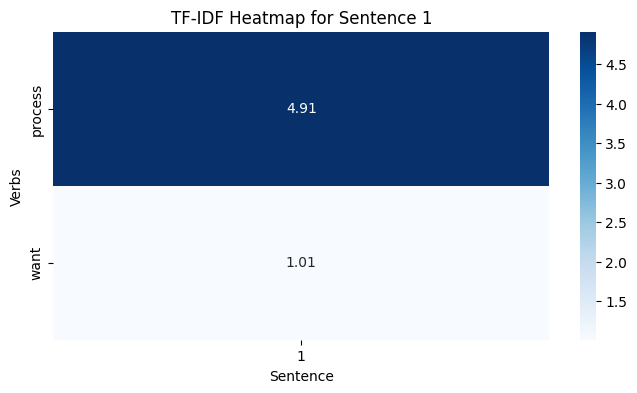

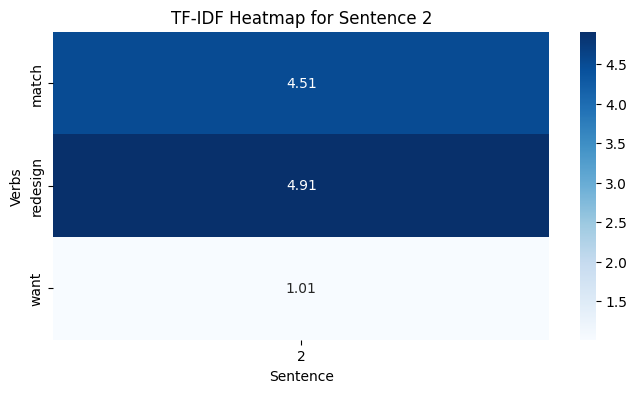

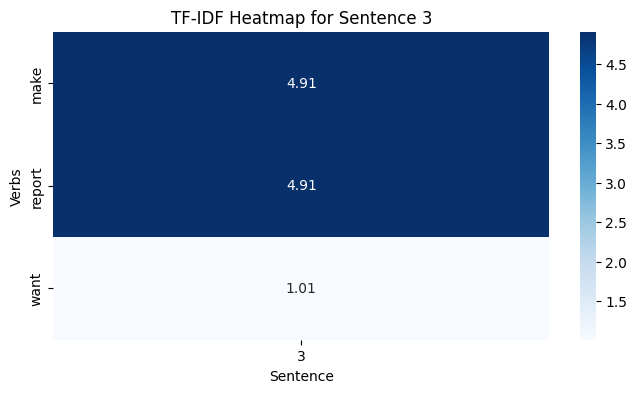

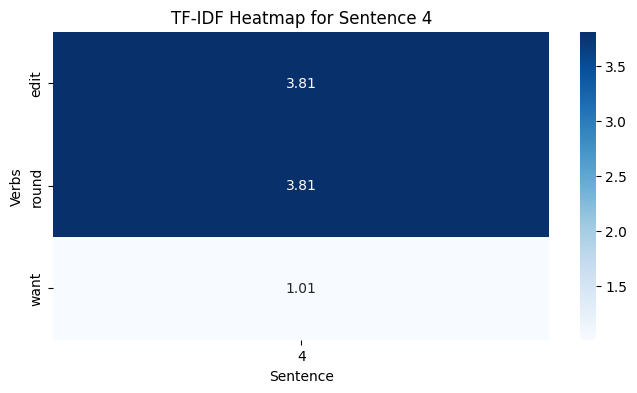

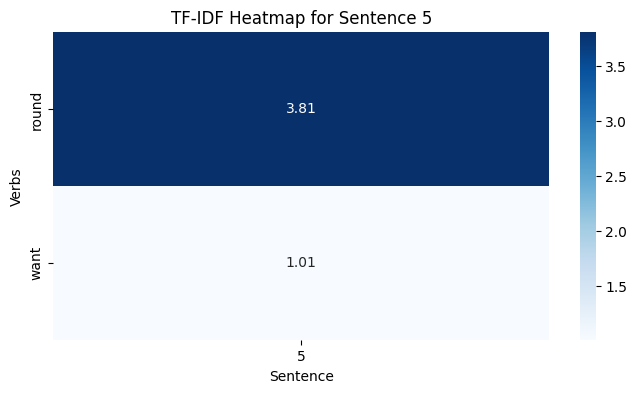

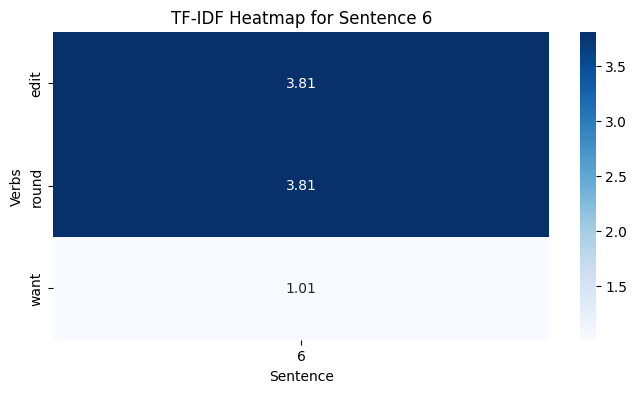

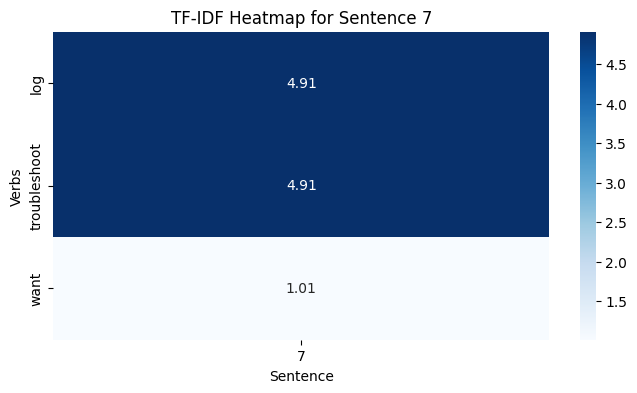

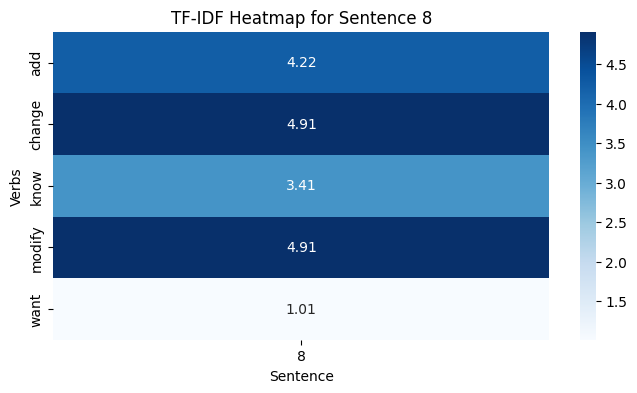

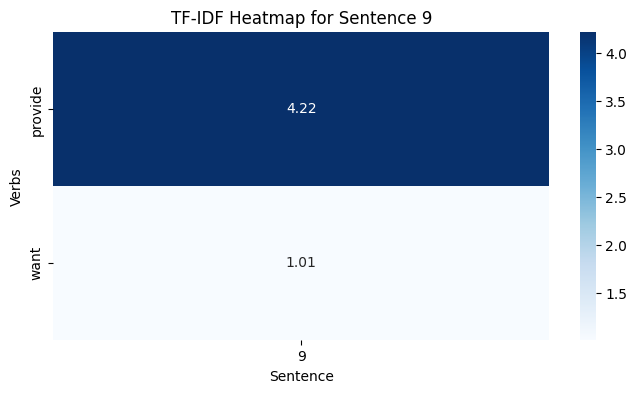

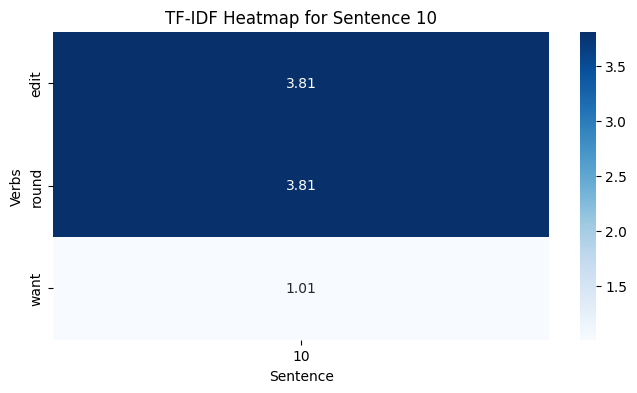

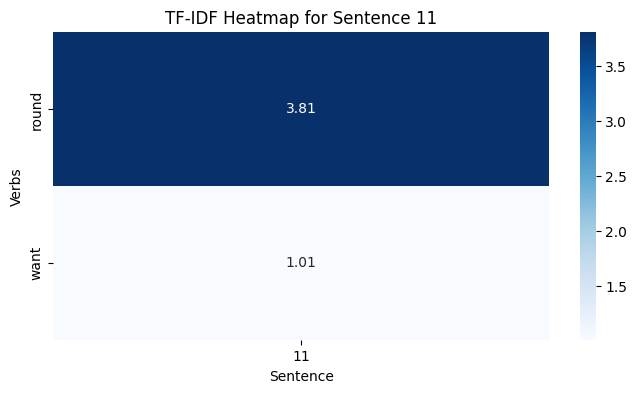

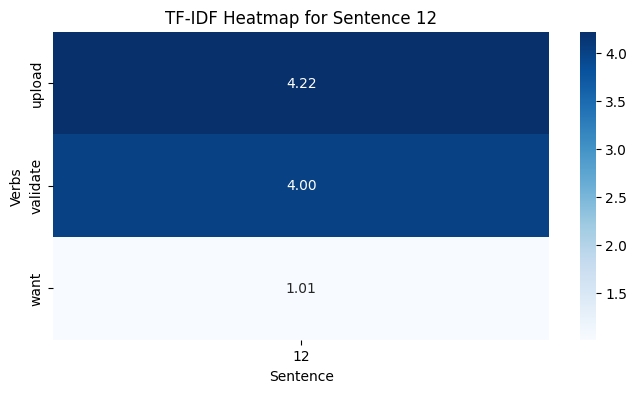

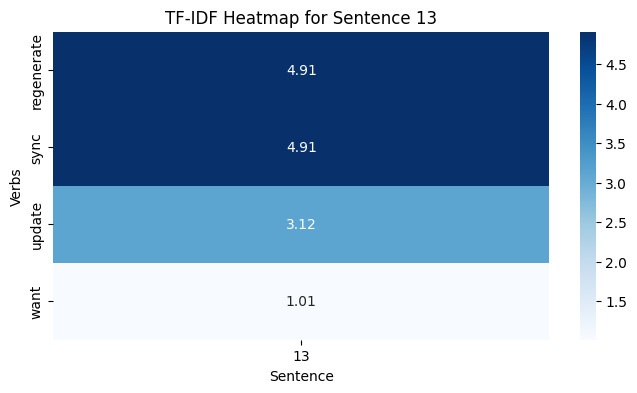

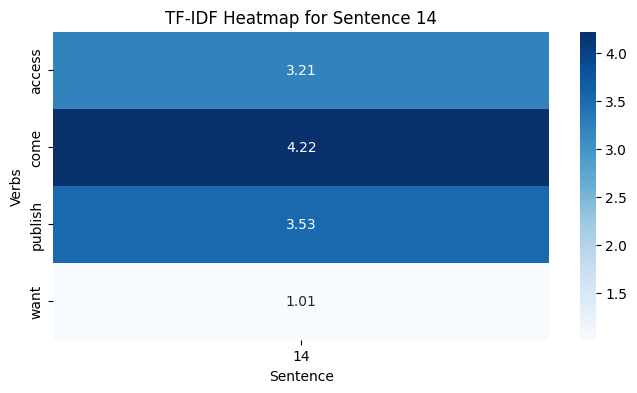

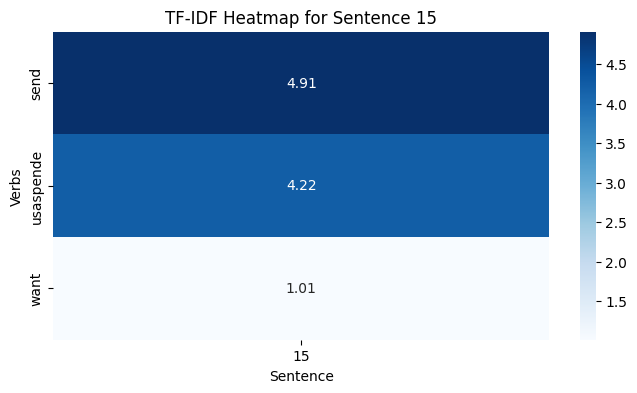

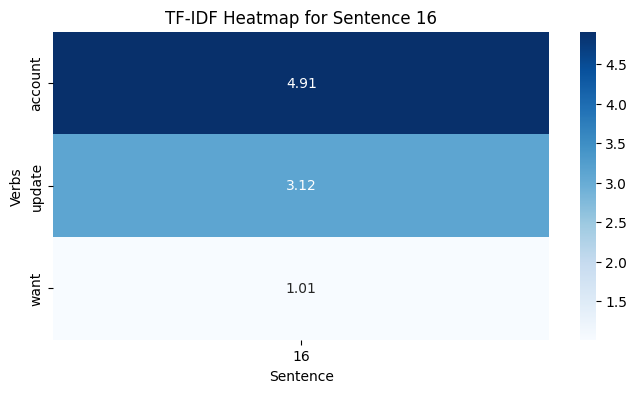

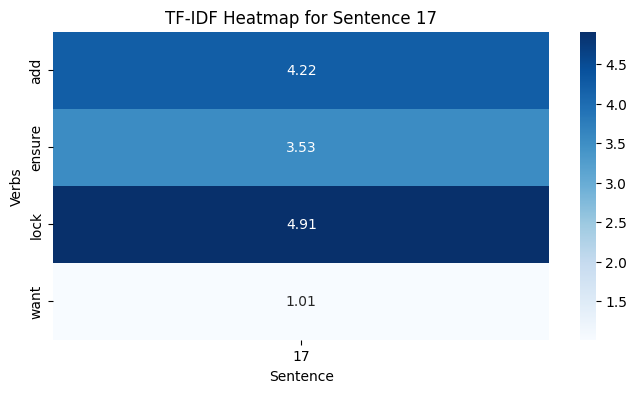

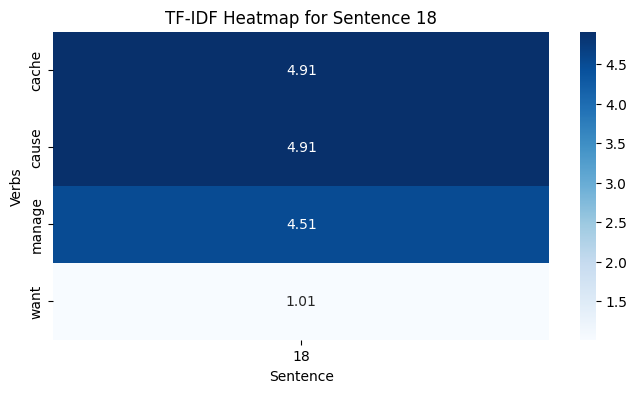

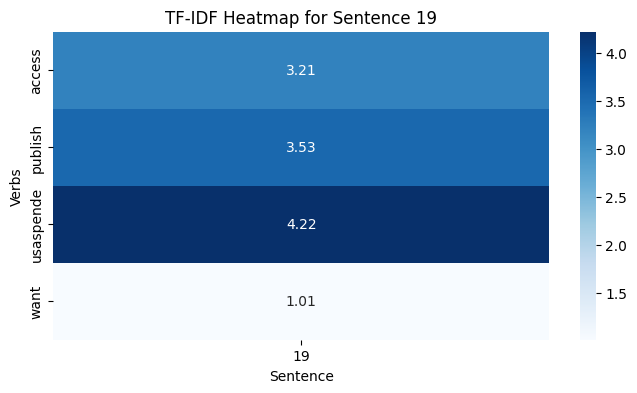

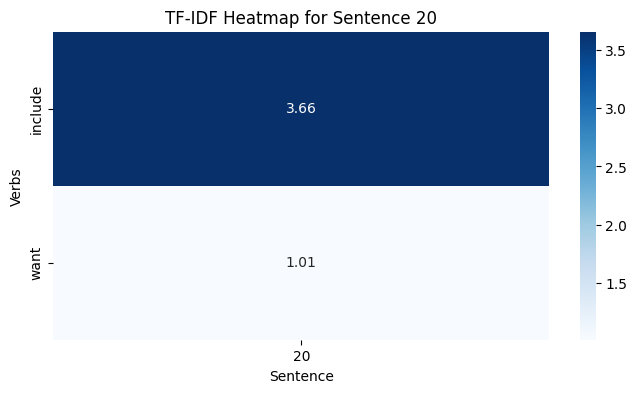

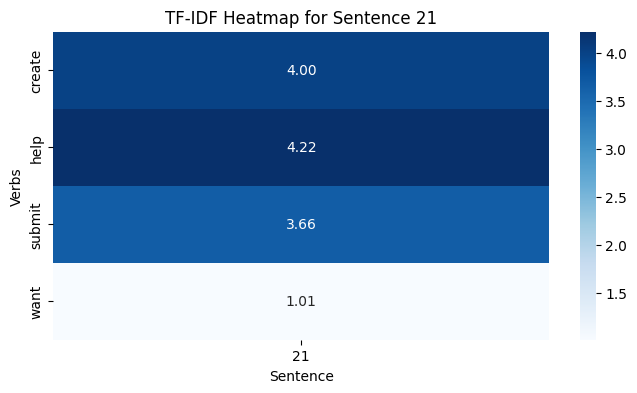

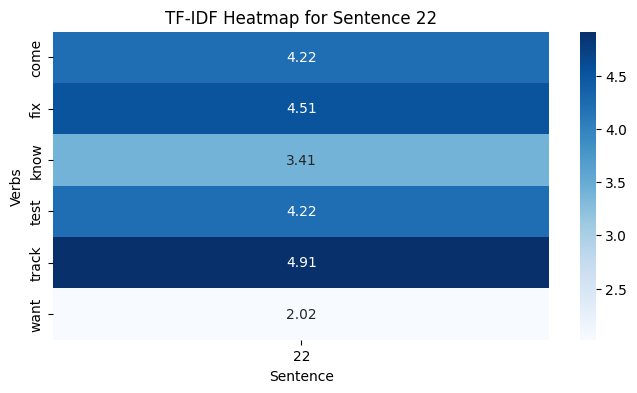

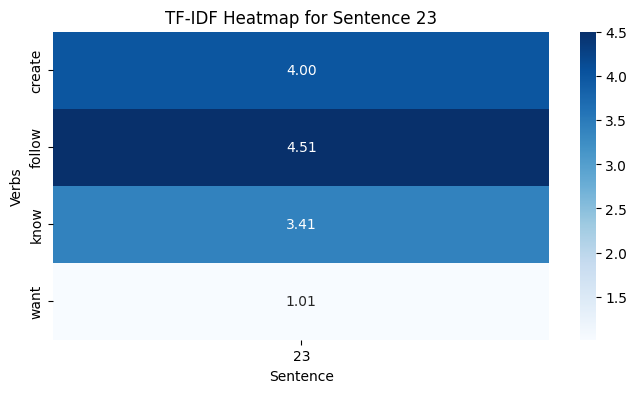

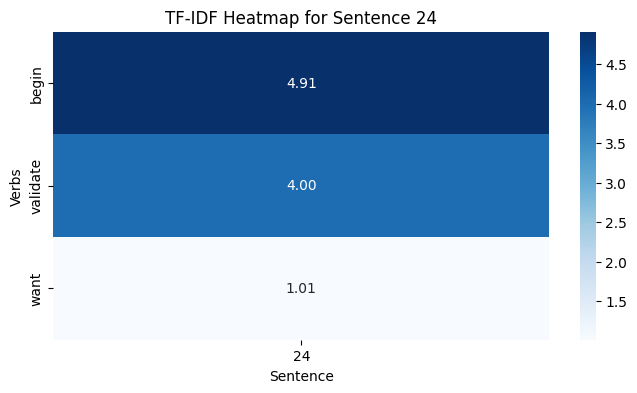

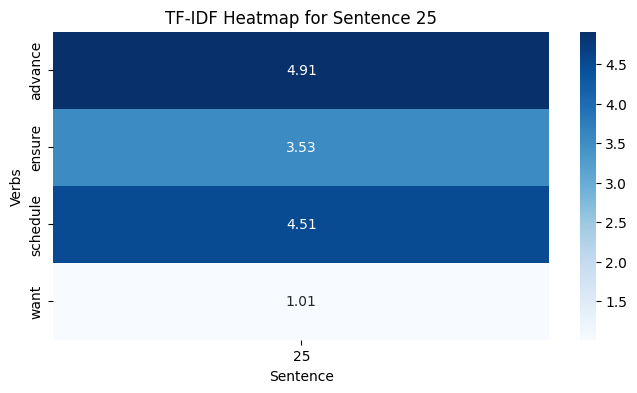

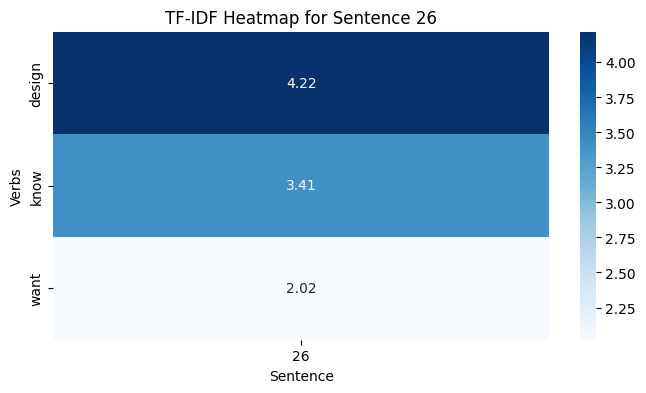

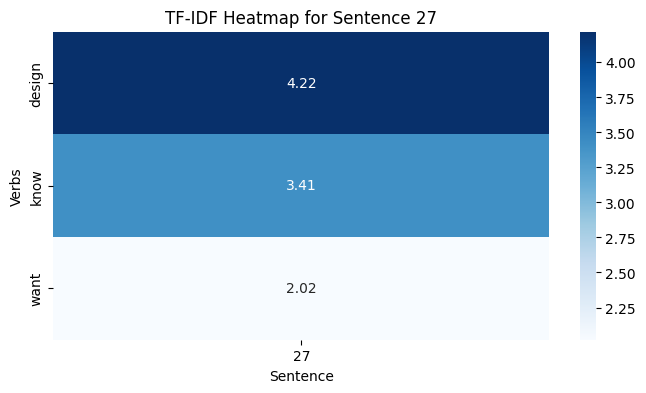

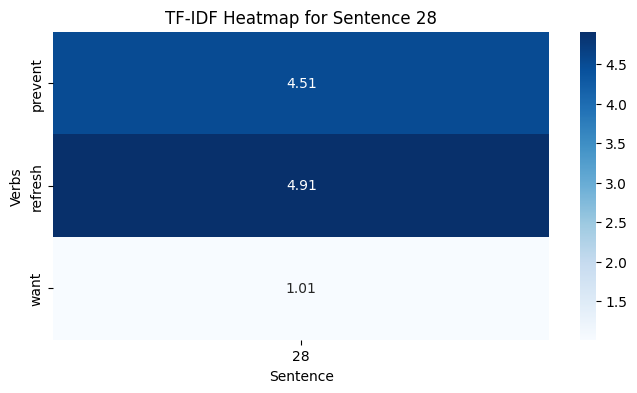

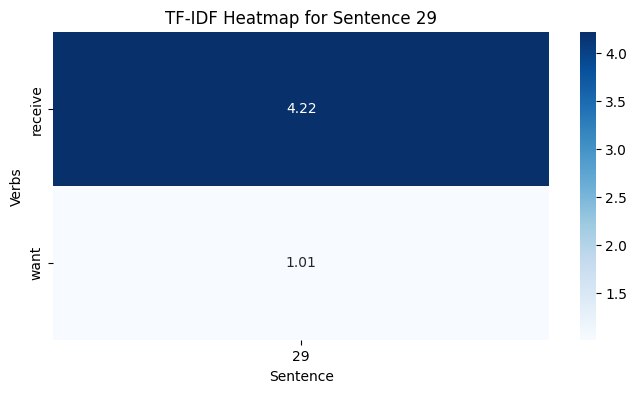

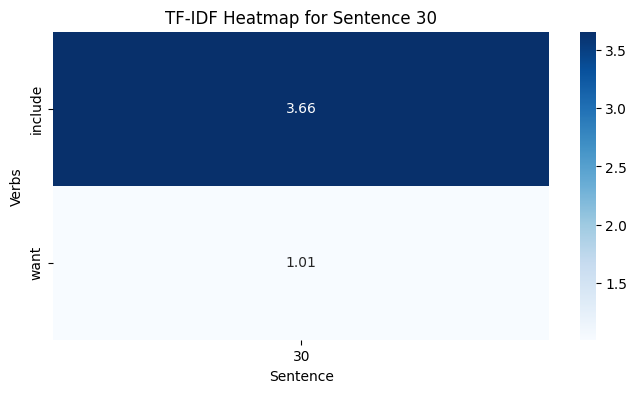

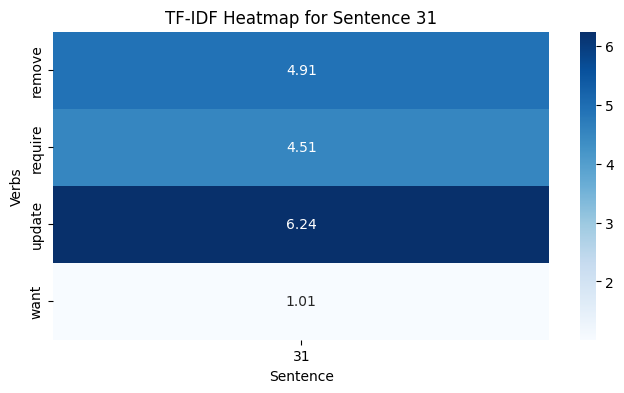

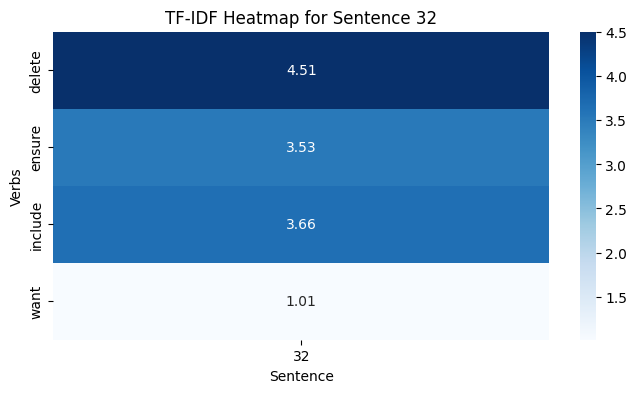

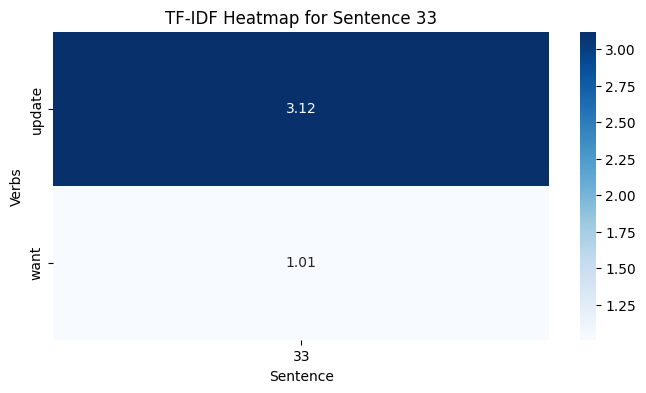

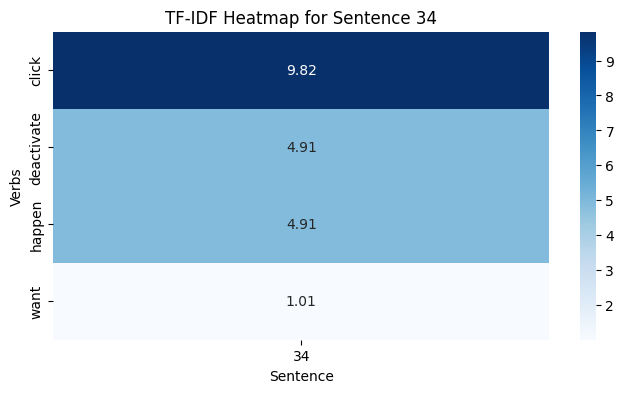

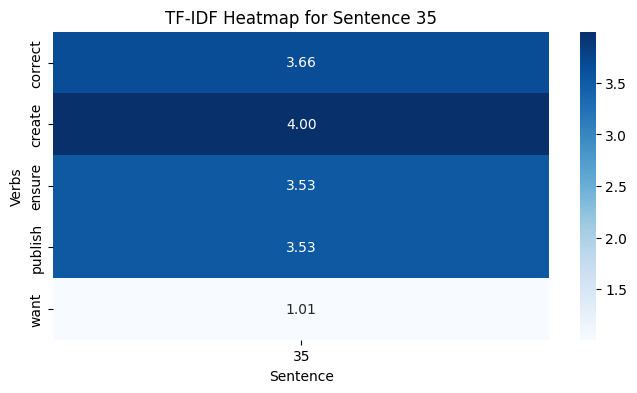

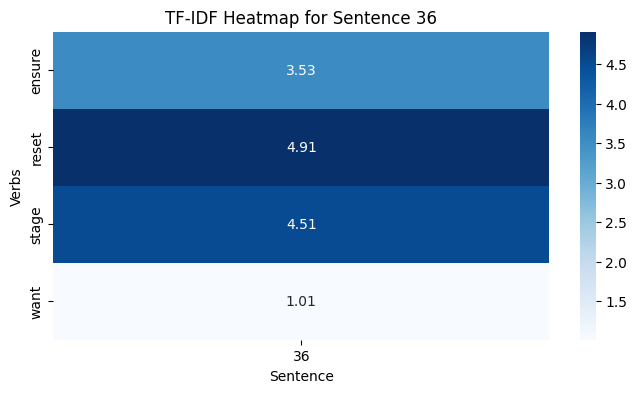

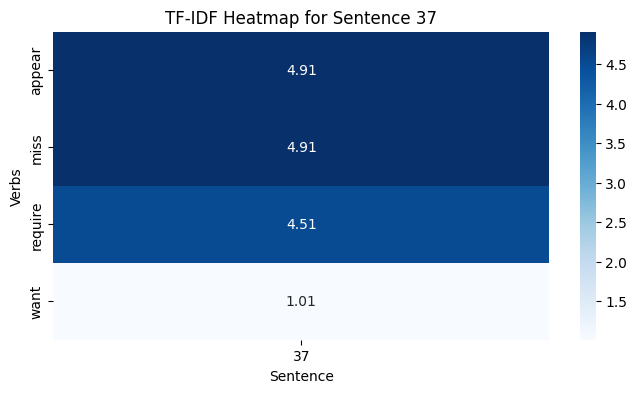

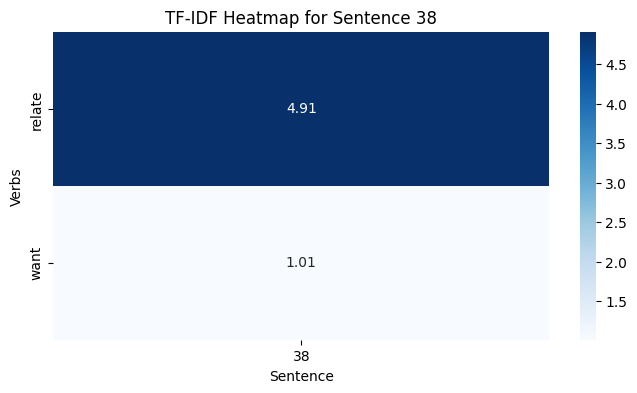

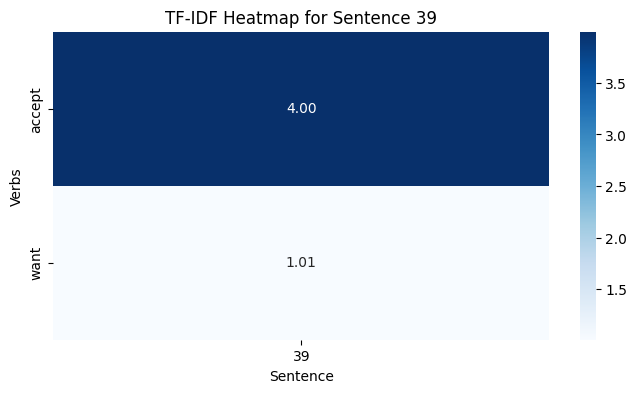

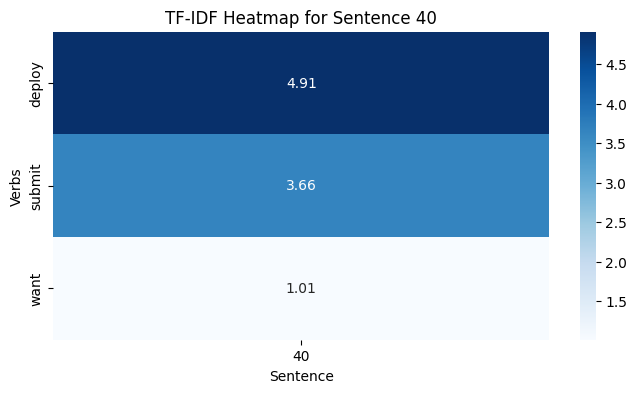

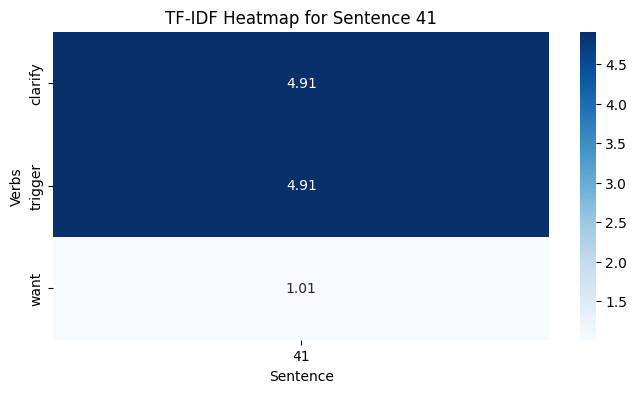

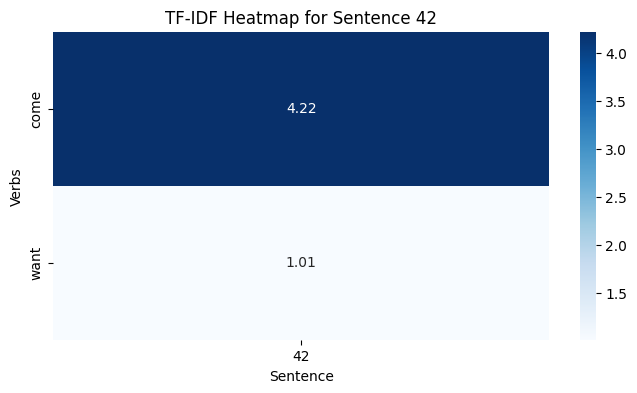

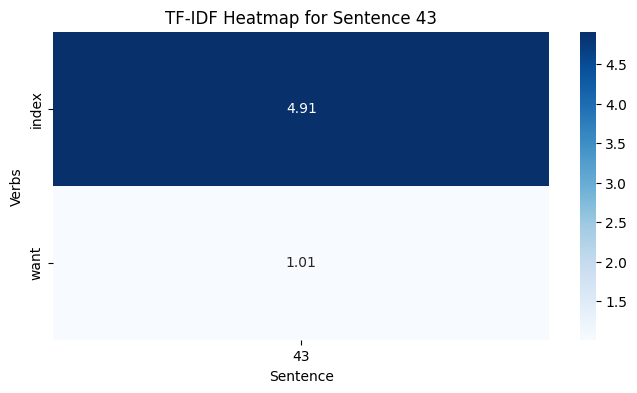

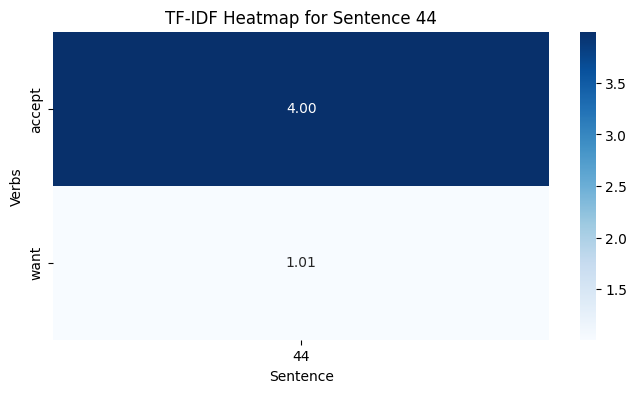

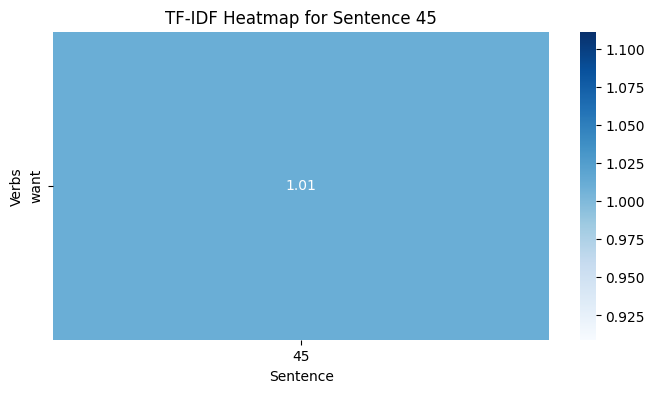

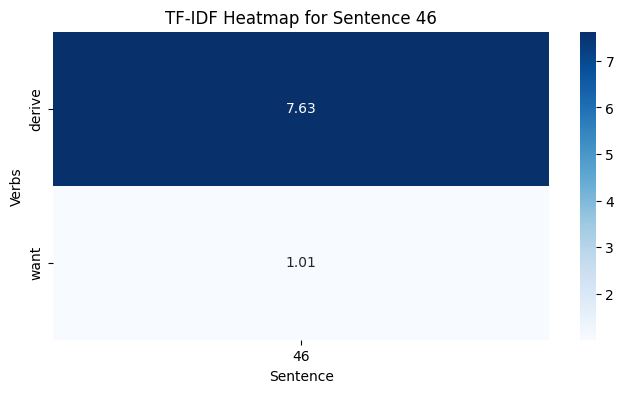

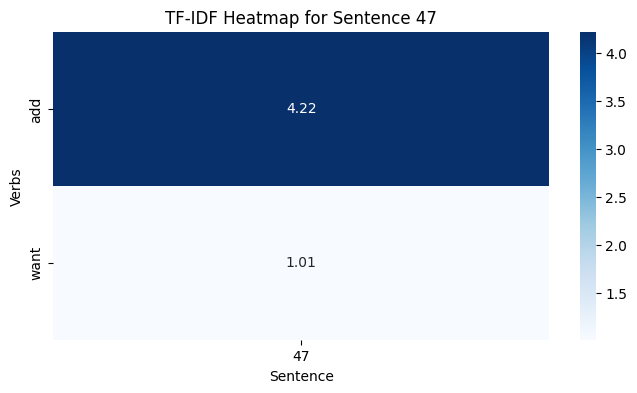

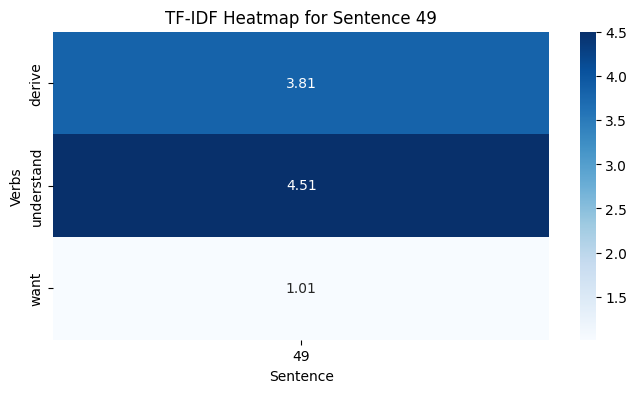

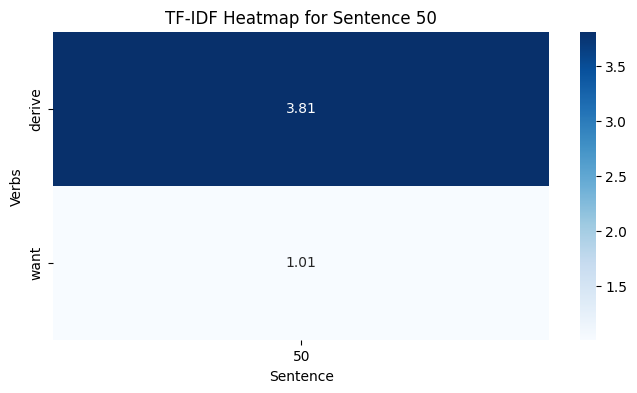

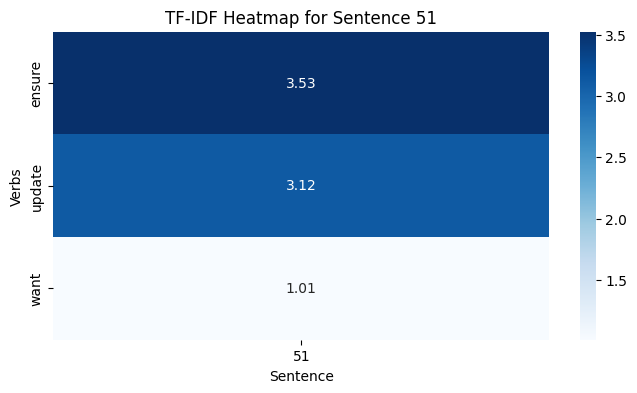

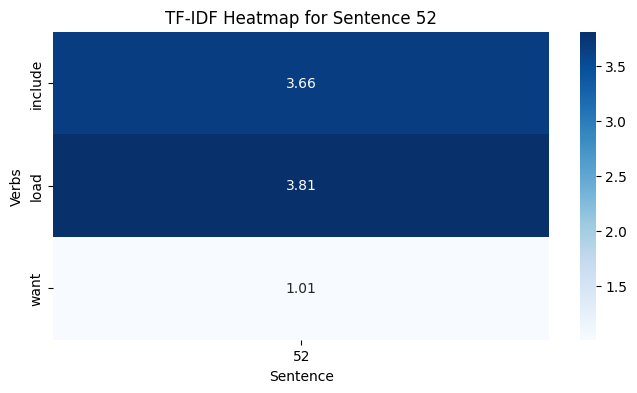

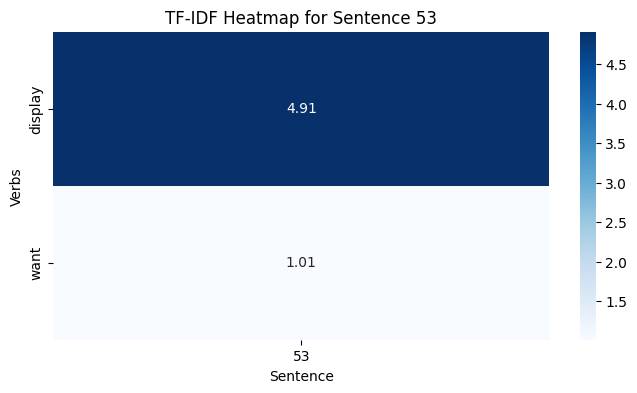

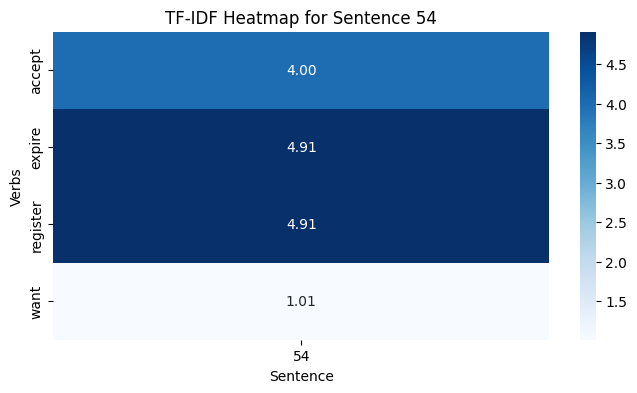

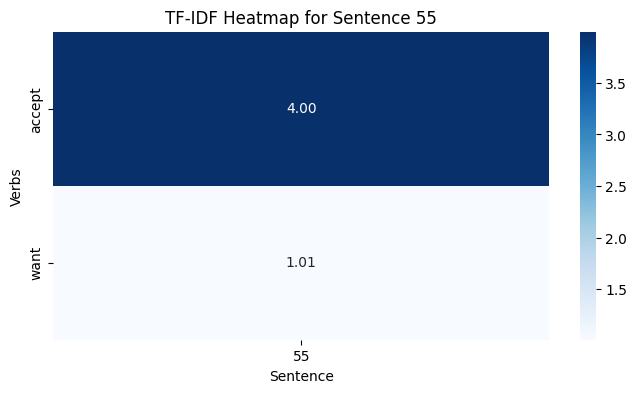

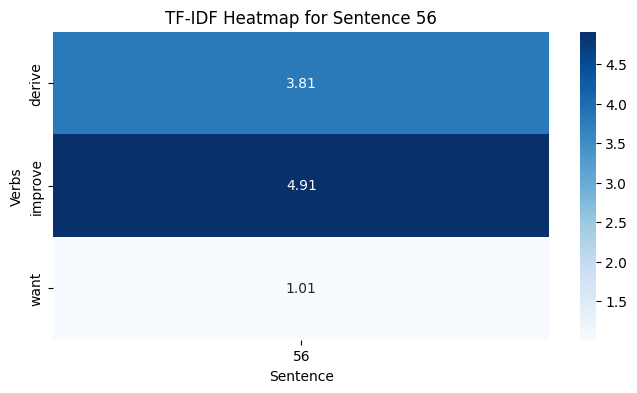

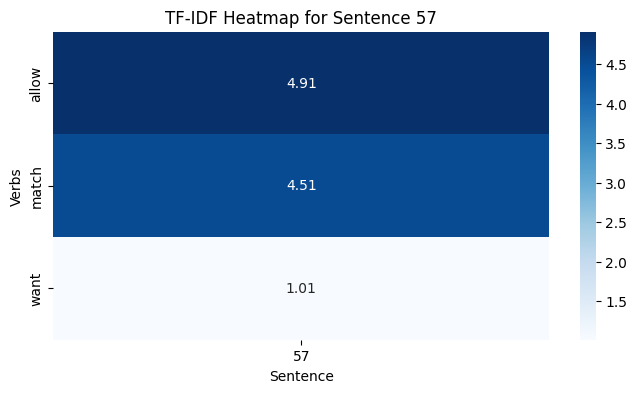

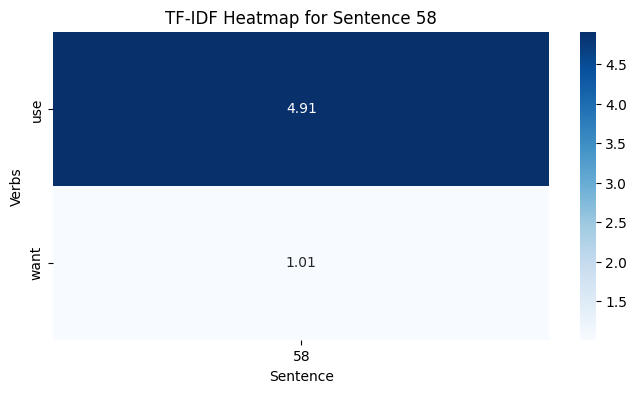

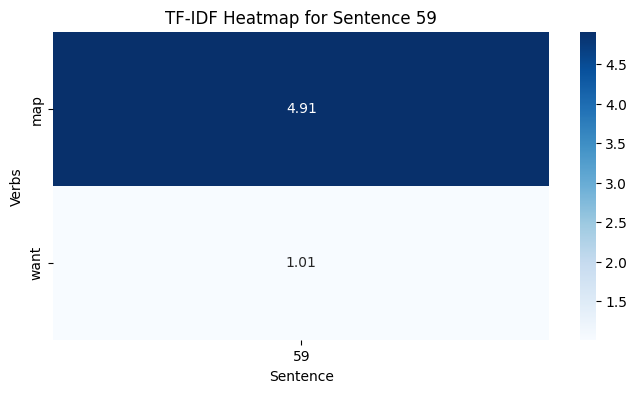

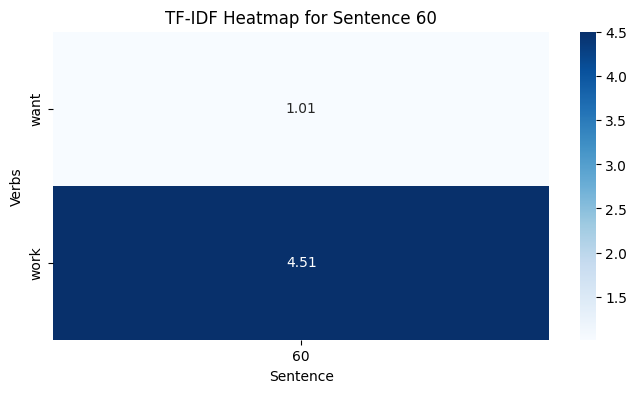

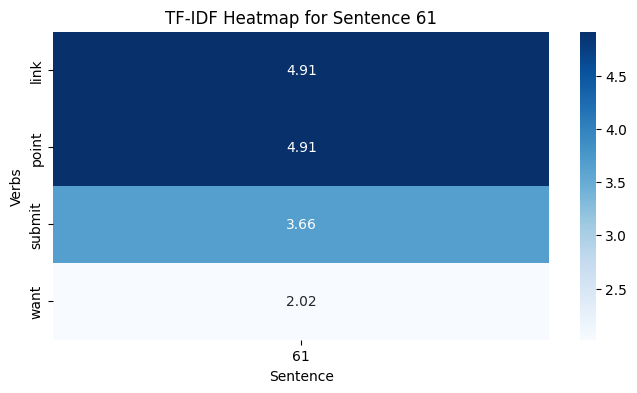

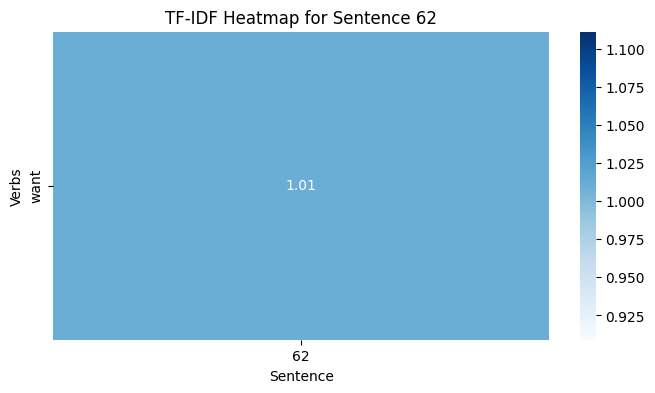

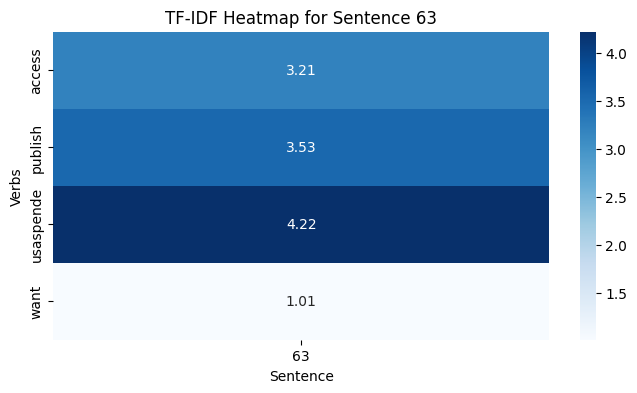

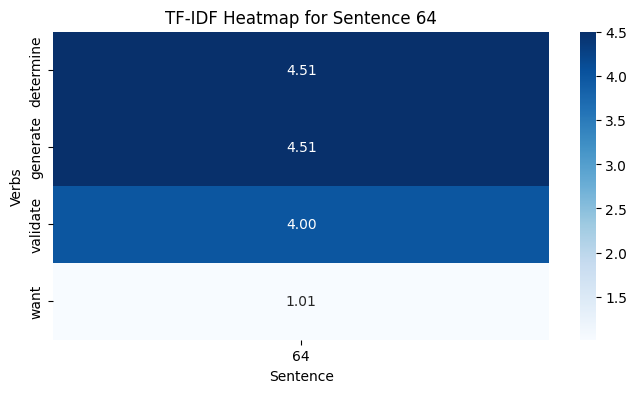

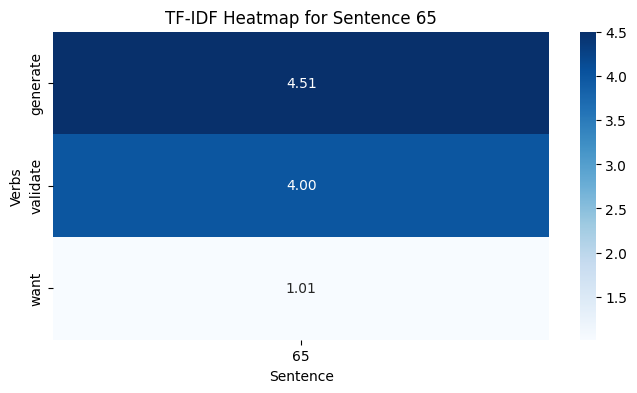

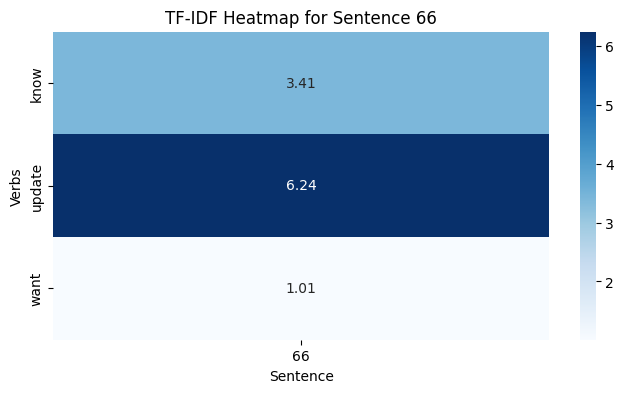

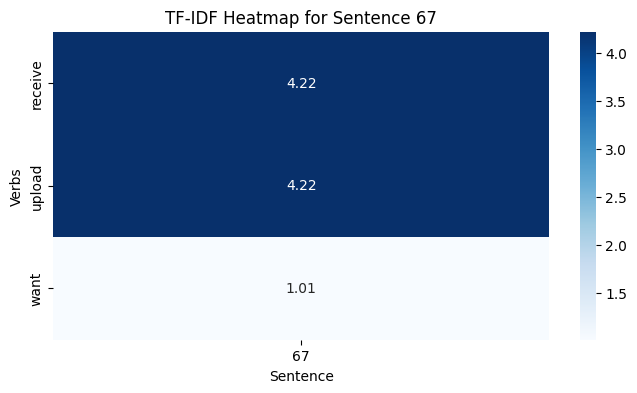

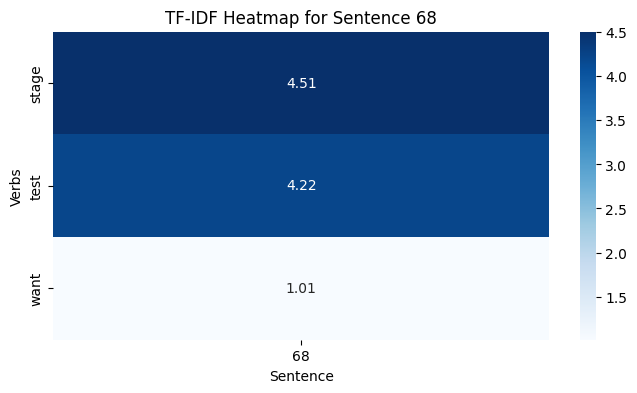

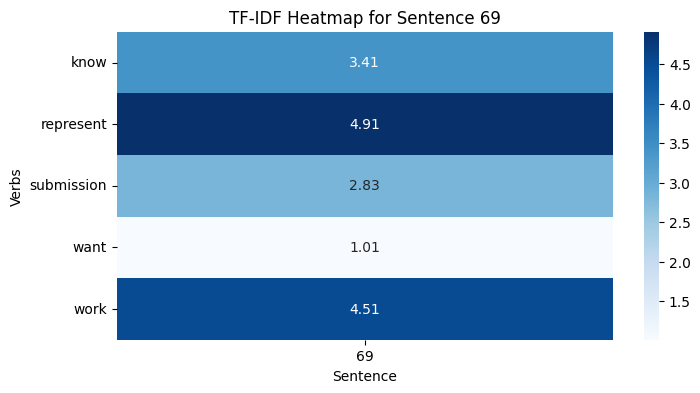

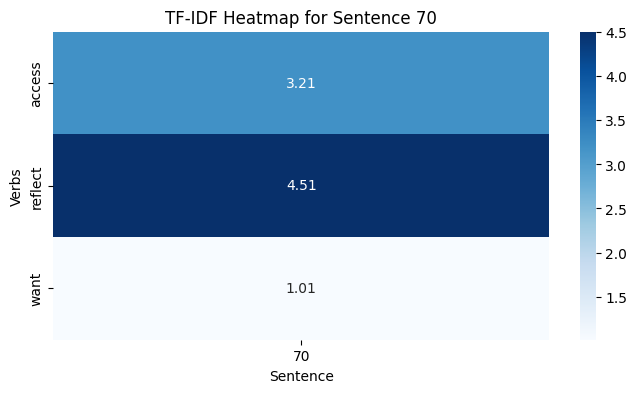

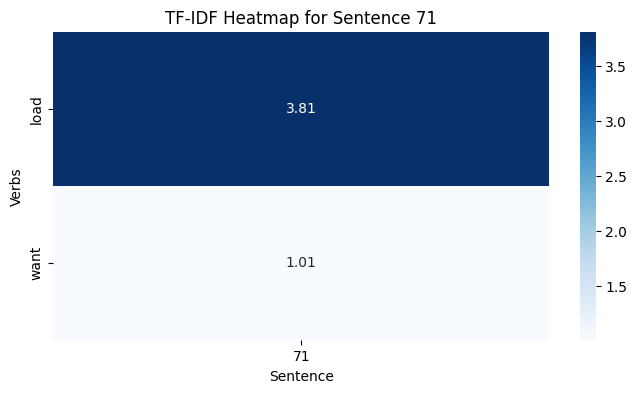

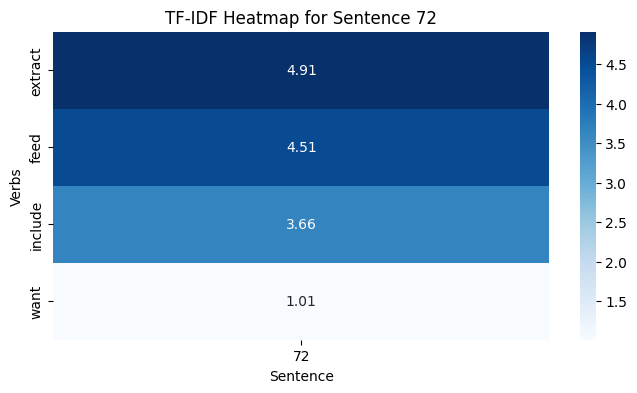

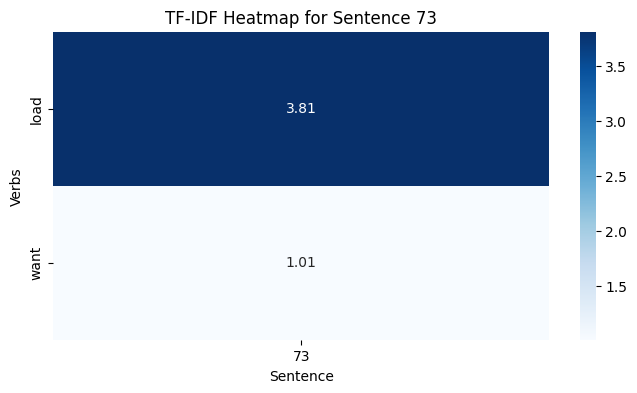

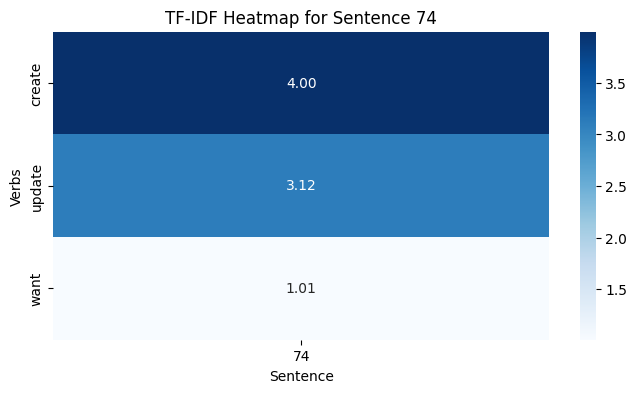

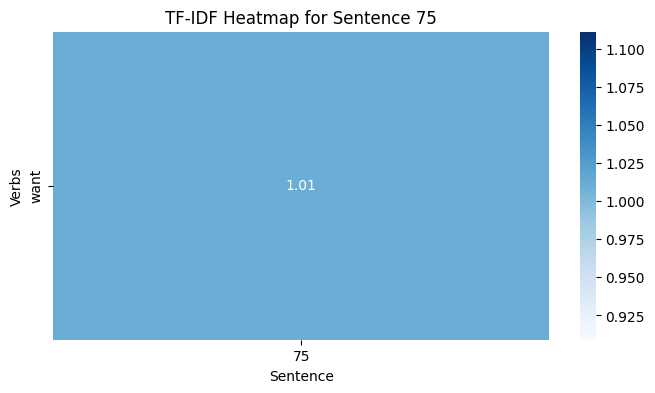

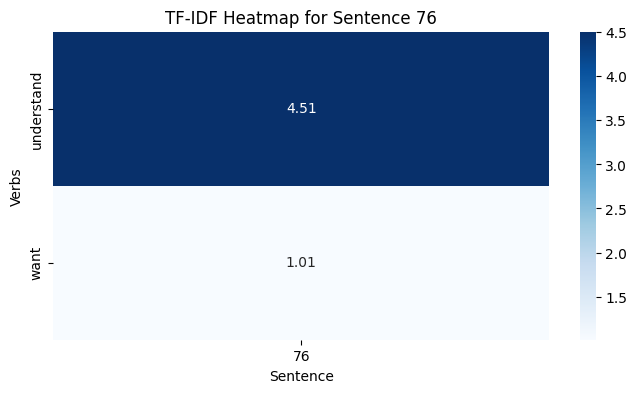

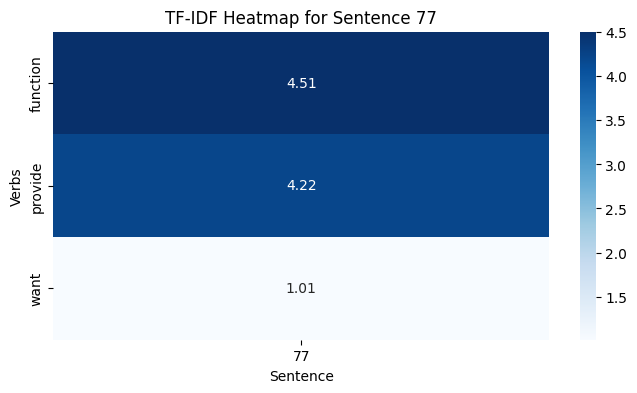

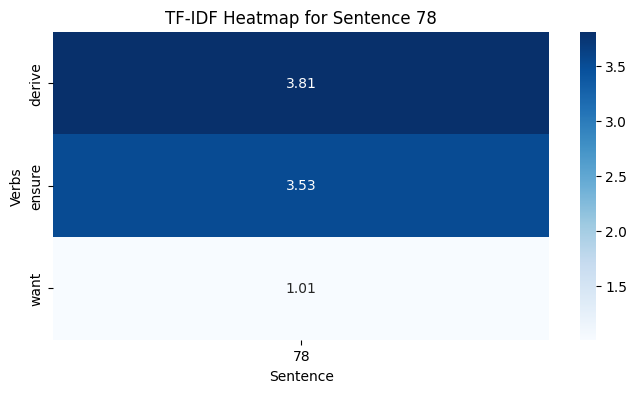

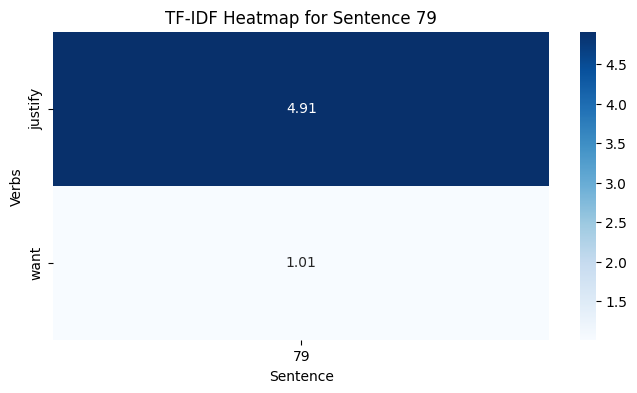

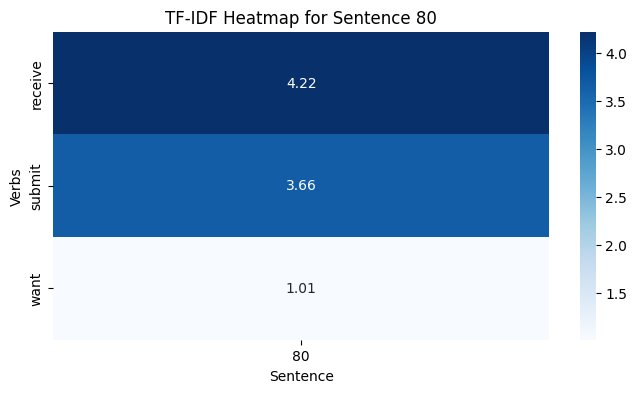

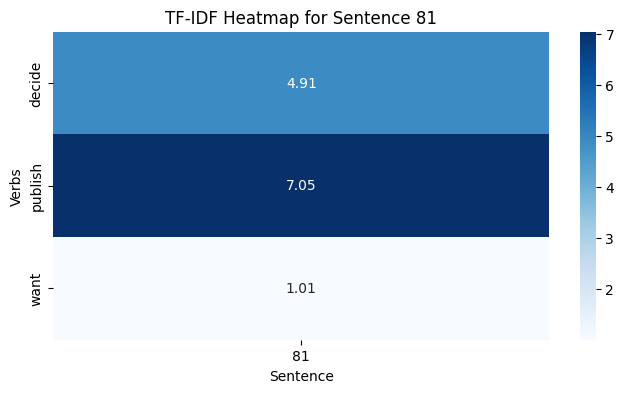

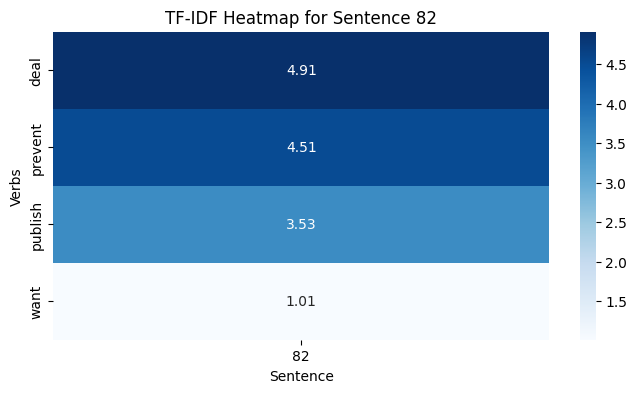

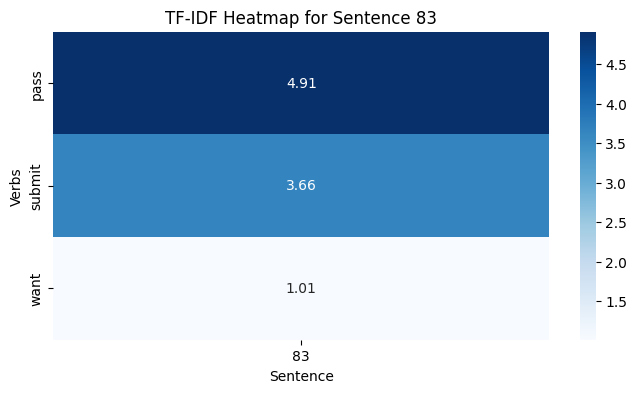

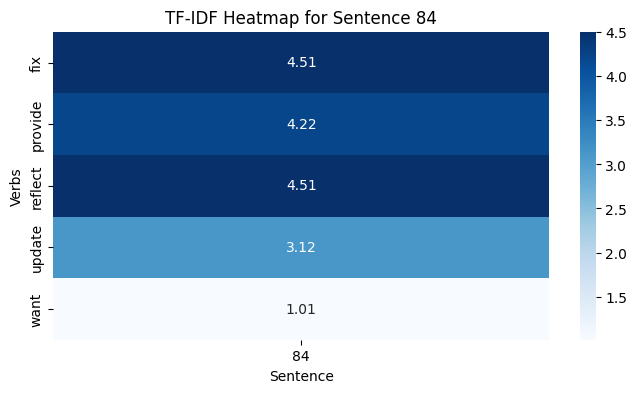

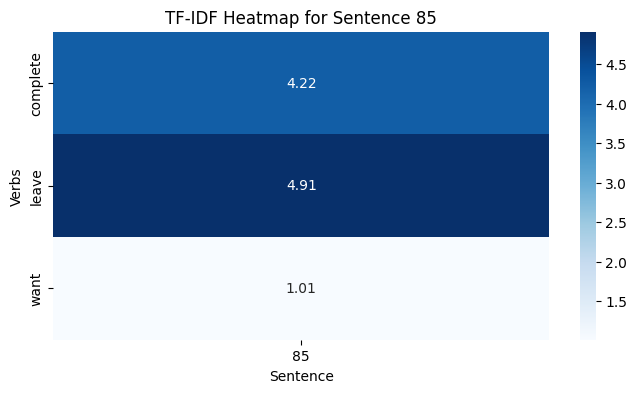

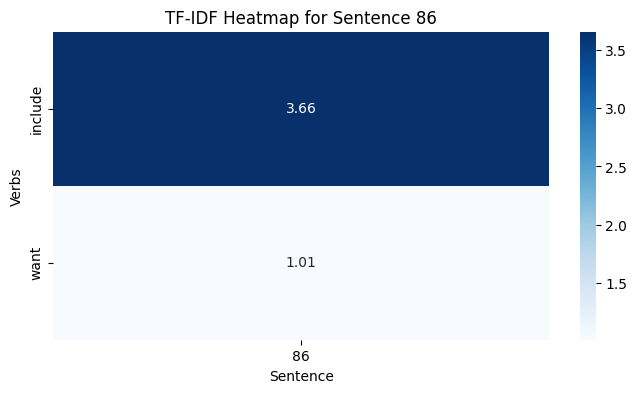

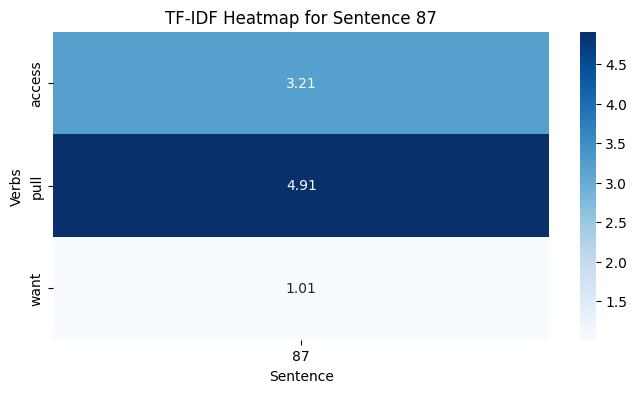

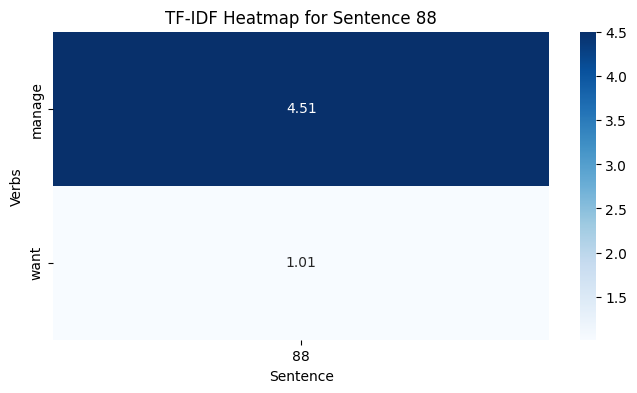

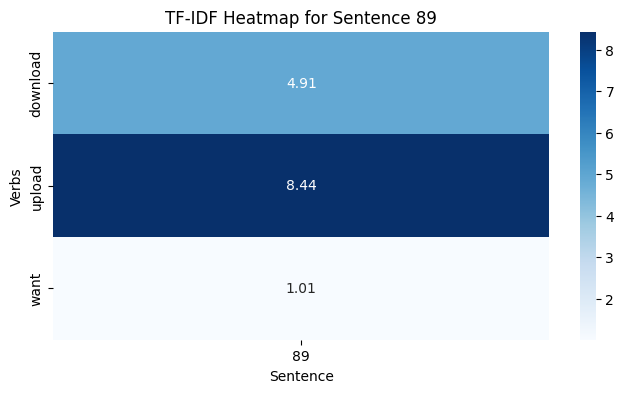

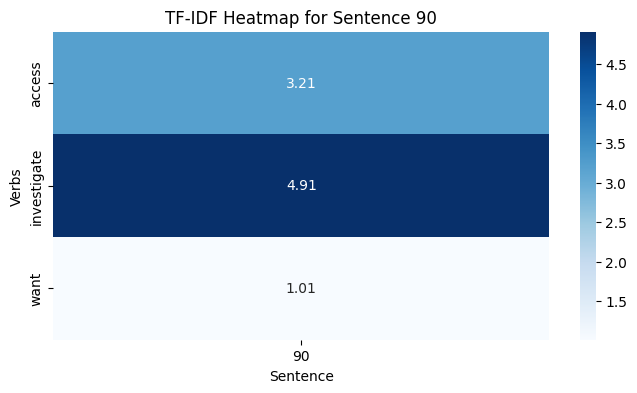

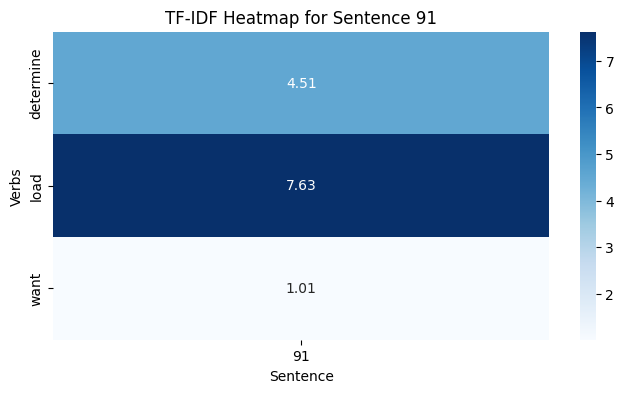

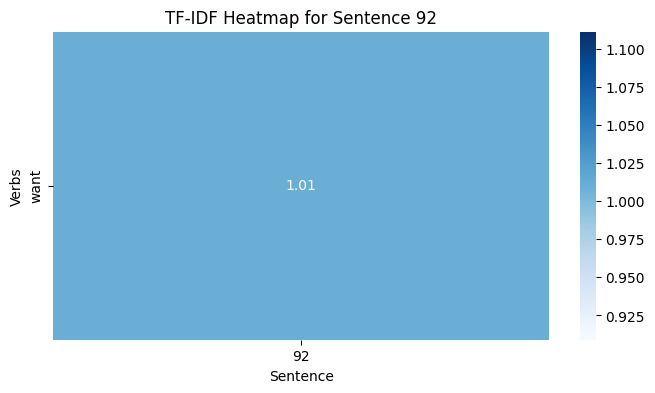

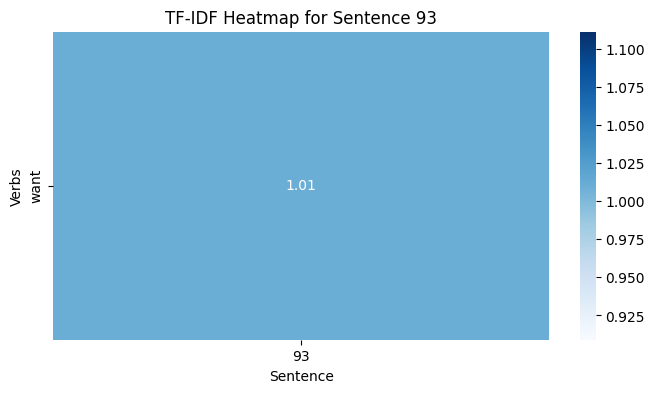

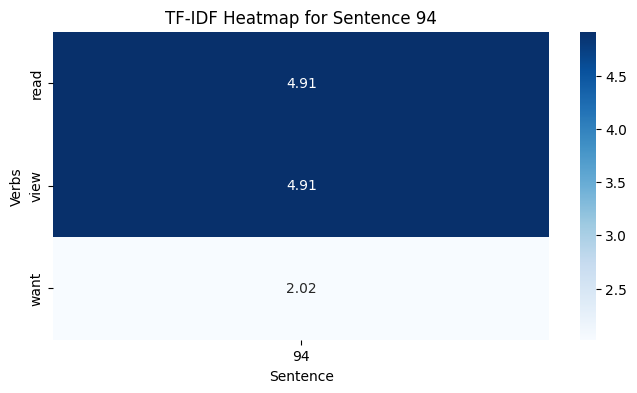

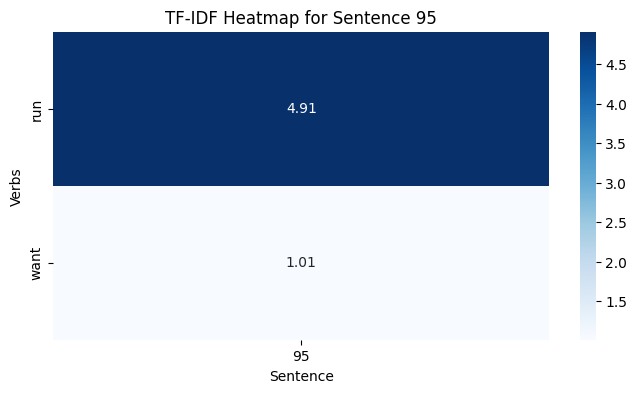

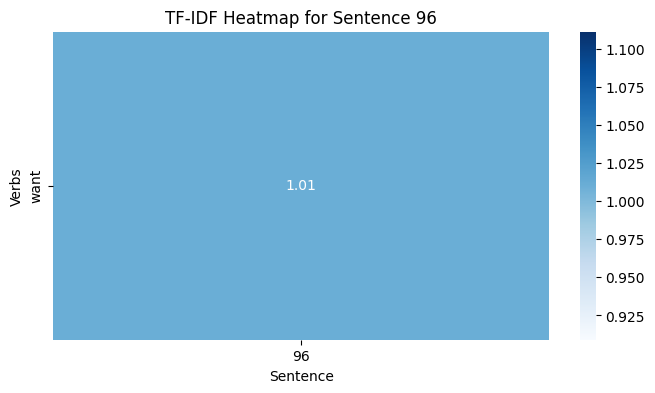

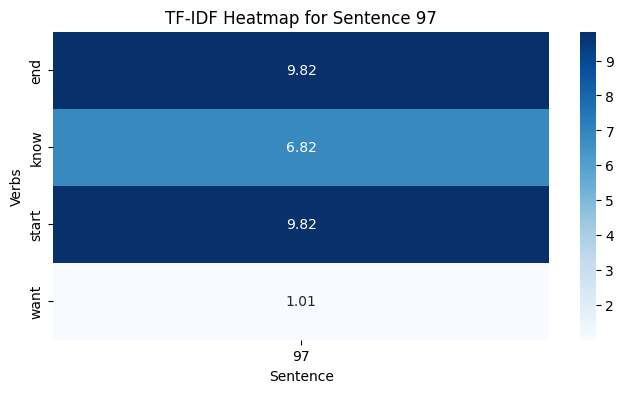

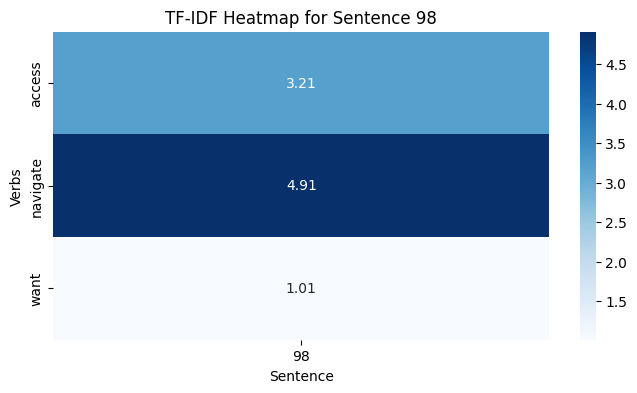

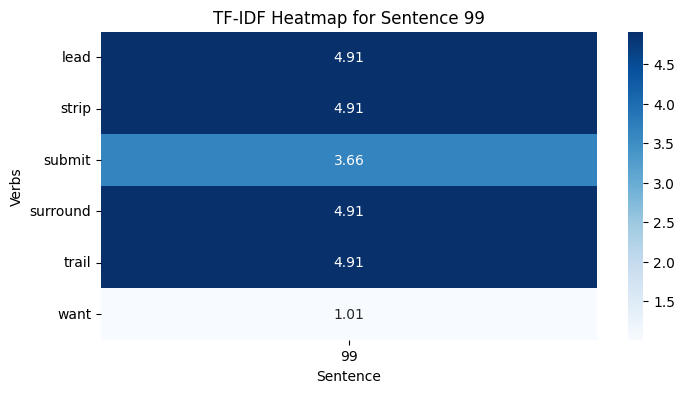

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert `nouns_verbs_list` into a structured DataFrame
data_rows = []
for sentence_idx, data in sorted(nouns_verbs_list.items()):  # Ensure sentence order
    for verb, score in data["verbs"]:
        data_rows.append({"Sentence": sentence_idx + 1, "Word": verb, "POS": "VERB", "TF-IDF": score})

# Convert to DataFrame
df = pd.DataFrame(data_rows)

# **Fix: Sort DataFrame by Sentence and Word**
df = df.groupby(["Word", "Sentence"], as_index=False)["TF-IDF"].sum()
df = df.sort_values(by=["Sentence", "TF-IDF"], ascending=[True, False])  # Sort by Sentence & TF-IDF

# **Generate Separate Ordered Heatmaps for Each Sentence**
for sentence_num in sorted(df["Sentence"].unique()):  # Ensure sentences are processed in order
    sentence_df = df[df["Sentence"] == sentence_num]  # Filter for one sentence

    # Pivot table with sorted words
    pivot_df = sentence_df.pivot(index="Word", columns="Sentence", values="TF-IDF").fillna(0)

    # **Plot Ordered Heatmap**
    plt.figure(figsize=(8, 4))
    sns.heatmap(pivot_df, cmap="Blues", annot=True, fmt=".2f")

    plt.xlabel("Sentence")
    plt.ylabel("Verbs")
    plt.title(f"TF-IDF Heatmap for Sentence {sentence_num}")

    plt.show()  # Show each heatmap separately


# Input, Action and Condition Words


In [14]:
from spacy.tokens import Doc

In [15]:
def custom_dep_tree(span, main_verb_index):
  words = [token.text for token in span]
  new_doc = Doc(span.vocab, words=words)

  for i, token in enumerate(span):
    new_doc[i].pos_ = token.pos_
    new_doc[i].lemma_ = token.lemma_
    new_doc[i].tag_ = token.tag_
    new_doc[i].dep_ = token.dep_
    head_index = min(token.head.i - span[0].i, len(new_doc) - 1)
    new_doc[i].head = new_doc[head_index]

  if main_verb_index is not None:
    # Set the main verb as root
    new_doc[main_verb_index].dep_ = "ROOT"
    new_doc[main_verb_index].head = new_doc[main_verb_index]

  # Adjust dependencies for other tokens
  for token in new_doc:
      if token.i != main_verb_index and token.dep_ == "ROOT":
          token.dep_ = "dep"
          token.head = new_doc[main_verb_index]

  return new_doc


In [16]:
res = []
for id,tokens in enumerate(sentence_tokens):
  main_verb_index = None
  results = {}
  for i, token in enumerate(tokens):

    if token.lemma_ == "want":
      for j, next_token in enumerate(tokens[i:], start=i):
        if (next_token.pos_ == "VERB" and
          next_token.lemma_ not in ["want", "be", "have"] and
          not next_token.dep_ == "aux"):
          main_verb_index = j
          break

      if main_verb_index:
        break

  if main_verb_index is not None:

    main_verb_text = tokens[main_verb_index].text
    orig_main_verb_index = next(
        (i for i, token in enumerate(sentence_spans[id])
         if token.text == main_verb_text),
        None
    )

    modified_doc = custom_dep_tree(sentence_spans[id], orig_main_verb_index)
    main_verb = modified_doc[orig_main_verb_index]
    # print(main_verb)


    # Role Extraction
    role = None
    for i, token in enumerate(sentence_spans[id]):
        if token.text.lower() == "as" and i + 2 < len(sentence_spans[id]):
            # Collect role words
            role_words = []
            for j in range(i + 2, len(sentence_spans[id])):
                current_token = sentence_spans[id][j]
                if current_token.text.lower() == "," and j + 1 < len(sentence_spans[id]) and sentence_spans[id][j+1].text.lower() == "i":
                    break
                role_words.append(current_token.text)

            role = " ".join(role_words)
            break


    # Condition Extraction
    condns = None
    for i, token in enumerate(sentence_spans[id]):
        if (token.text.lower() == "so"):
            # Collect condition words
            condn_words = []
            for j in range(i, len(sentence_spans[id])):
                current_token = sentence_spans[id][j]
                if current_token.text.lower() == ".":
                  break
                condn_words.append(current_token.text)

            condns = " ".join(condn_words)
            break


  results = {
          'main_action': main_verb.text,
          'role': role or "Unknown",
          'conditions': condns or "Unknown",
          'original_text': sentence_spans[id],
          'filtered_text':tokens,
          'main_verb_index': main_verb_index,
          'dependencies': [(token.text, token.dep_, token.head.text)
                          for token in modified_doc if token.i != orig_main_verb_index],
          'modified_doc': modified_doc
      }
  res.append(results)
  print("\n", results['original_text'])
  print("Main Action:", results['main_action'])
  print("Role:", results['role'])
  print("Conditions:", results['conditions'])
  print("Dependencies: ", results['dependencies'])


 ﻿As a Data user, I want to have the 12-19-2017 deletions processed.

Main Action: processed
Role: Unknown
Conditions: Unknown
Dependencies:  [('\ufeffAs', 'nummod', 'user'), ('a', 'det', 'user'), ('Data', 'compound', 'user'), ('user', 'dep', 'want'), (',', 'punct', 'want'), ('I', 'nsubj', 'want'), ('want', 'dep', 'processed'), ('to', 'aux', 'have'), ('have', 'xcomp', 'want'), ('the', 'det', 'deletions'), ('12', 'nummod', 'deletions'), ('-', 'punct', '2017'), ('19', 'nummod', '2017'), ('-', 'punct', '2017'), ('2017', 'prep', '12'), ('deletions', 'dobj', 'have'), ('.', 'punct', 'want'), ('\n', 'dep', '.')]

 As a UI designer, I want to redesign the Resources page, so that it matches the new Broker design styles.

Main Action: redesign
Role: UI designer
Conditions: so that it matches the new Broker design styles
Dependencies:  [('As', 'prep', 'want'), ('a', 'det', 'designer'), ('UI', 'compound', 'designer'), ('designer', 'pobj', 'As'), (',', 'punct', 'want'), ('I', 'nsubj', 'want'), ('w

# Dependency Parsing

In [17]:
for i,result in enumerate(res):
    data = []
    displacy.render(result['modified_doc'], style="dep")
    filtered_words = [token.text for token in result['filtered_text']]
    filtered_tokens = [token for token in result['modified_doc'] if token.text in filtered_words]
    for token in filtered_tokens:
        data.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_])

    # Print the table
    headers = ["Text", "Lemma", "POS", "Tag", "Dependency"]
    print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma    │ POS   │ Tag   │ Dependency   │
╞═══════════╪══════════╪═══════╪═══════╪══════════════╡
│ ﻿As        │ ﻿as       │ NUM   │ CD    │ nummod       │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ Data      │ Data     │ PROPN │ NNP   │ compound     │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ user      │ user     │ NOUN  │ NN    │ dep          │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ want      │ want     │ VERB  │ VBP   │ dep          │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ 12        │ 12       │ NUM   │ CD    │ nummod       │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ 19        │ 19       │ NUM   │ CD    │ nummod       │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ 2017      │ 2017     │ NUM   │ CD    │ prep         │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ deletions │ deletion │ NOUN  │ NNS   │ dobj 

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ UI        │ ui        │ NOUN  │ NN    │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ designer  │ designer  │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ redesign  │ redesign  │ VERB  │ VB    │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ Resources │ Resources │ PROPN │ NNPS  │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ page      │ page      │ NOUN  │ NN    │ dobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ matches   │ match     │ VERB  │ VBZ   │ advcl        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ new       │ new       │ ADJ  

╒═══════════════╤══════════════╤═══════╤═══════╤══════════════╕
│ Text          │ Lemma        │ POS   │ Tag   │ Dependency   │
╞═══════════════╪══════════════╪═══════╪═══════╪══════════════╡
│ UI            │ ui           │ NOUN  │ NN    │ compound     │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ designer      │ designer     │ NOUN  │ NN    │ pobj         │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ want          │ want         │ VERB  │ VBP   │ dep          │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ report        │ report       │ VERB  │ VB    │ ROOT         │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ Agencies      │ agency       │ NOUN  │ NNS   │ pobj         │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ user          │ user         │ NOUN  │ NN    │ compound     │
├───────────────┼──────────────┼───────┼───────┼──────────────┤
│ testing       │ testing      │ NOUN  │

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ UI         │ ui         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ designer   │ designer   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ round      │ round      │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ 2          │ 2          │ NUM   │ CD    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ DABS       │ DABS       │ PROPN │ NNP   │ nmod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS       │ FABS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ UI         │ ui         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ designer   │ designer   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ round      │ round      │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ 2          │ 2          │ NUM   │ CD    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Homepage   │ homepage   │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ edits      │ edit       │ NOUN  │ NNS   │ pobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ UI         │ ui         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ designer   │ designer   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ round      │ round      │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ 3          │ 3          │ NUM   │ CD    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Help       │ Help       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ page       │ page       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒══════════════╤══════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma        │ POS   │ Tag   │ Dependency   │
╞══════════════╪══════════════╪═══════╪═══════╪══════════════╡
│ Developer    │ developer    │ NOUN  │ NN    │ pobj         │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ want         │ want         │ VERB  │ VBP   │ dep          │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ able         │ able         │ ADJ   │ JJ    │ acomp        │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ log          │ log          │ VERB  │ VB    │ ROOT         │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ better       │ well         │ ADV   │ RBR   │ advmod       │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ troubleshoot │ troubleshoot │ VERB  │ VB    │ advcl        │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ issues       │ issue        │ NOUN  │ NNS   │ dobj   

╒═══════════════╤═══════════════╤═══════╤═══════╤══════════════╕
│ Text          │ Lemma         │ POS   │ Tag   │ Dependency   │
╞═══════════════╪═══════════════╪═══════╪═══════╪══════════════╡
│ Developer     │ developer     │ NOUN  │ NN    │ pobj         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ want          │ want          │ VERB  │ VBP   │ dep          │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ add           │ add           │ VERB  │ VB    │ ROOT         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ updates       │ update        │ NOUN  │ NNS   │ dobj         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ FABS          │ fabs          │ NOUN  │ NN    │ compound     │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ submission    │ submission    │ NOUN  │ NN    │ pobj         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ modified      │ modify 

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ DevOps       │ DevOps      │ PROPN │ NNP   │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ engineer     │ engineer    │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ New          │ New         │ PROPN │ NNP   │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ Relic        │ Relic       │ PROPN │ NNP   │ nsubj        │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ provide      │ provide     │ VERB  │ VB    │ ROOT         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ useful       │ useful      │ ADJ   │ JJ    │ amod         │
├───────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ UI         │ ui         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ designer   │ designer   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ round      │ round      │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ 2          │ 2          │ NUM   │ CD    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Help       │ Help       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ page       │ page       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ UI         │ ui         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ designer   │ designer   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ round      │ round      │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ 2          │ 2          │ NUM   │ CD    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Homepage   │ homepage   │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ edits      │ edit       │ NOUN  │ NNS   │ pobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ Broker   │ Broker   │ PROPN │ NNP   │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ user     │ user     │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ Upload   │ upload   │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ Validate │ validate │ VERB  │ VB    │ conj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ error    │ error    │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ message  │ message  │ NOUN  │ NN    │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ accurate │ accurate │ ADJ   │ JJ    │ amod         │
├─────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Broker     │ Broker     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ D1         │ d1         │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ file       │ file       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ generation │ generation │ NOUN  │ NN    │ nsubjpass    │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ synced     │ sync       │ VERB  │ VBN   │ ROOT         │
├────────────┼────────────┼───────┼───────┼─────────────

╒═══════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma   │ POS   │ Tag   │ Dependency   │
╞═══════════╪═════════╪═══════╪═══════╪══════════════╡
│ Website   │ website │ NOUN  │ NN    │ compound     │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ user      │ user    │ NOUN  │ NN    │ pobj         │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ want      │ want    │ VERB  │ VBP   │ dep          │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ access    │ access  │ VERB  │ VB    │ ROOT         │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ published │ publish │ VERB  │ VBN   │ amod         │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ FABS      │ fabs    │ NOUN  │ NN    │ compound     │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ files     │ file    │ NOUN  │ NNS   │ dobj         │
├───────────┼─────────┼───────┼───────┼──────────────┤
│ new       │ new     │ ADJ   │ JJ    │ amod         │
├─────────

╒═════════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═════════════╪═══════════╪═══════╪═══════╪══════════════╡
│ owner       │ owner     │ NOUN  │ NN    │ pobj         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ want        │ want      │ VERB  │ VBP   │ dep          │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ sure        │ sure      │ ADJ   │ JJ    │ acomp        │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ USAspending │ usaspende │ VERB  │ VBG   │ ROOT         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ send        │ send      │ VERB  │ VB    │ ccomp        │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ grant       │ grant     │ NOUN  │ NN    │ compound     │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ records     │ record    │ NOUN  │ NNS   │ dobj         │
├─────────────┼───────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer  │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ update     │ update     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Broker     │ Broker     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ validation │ validation │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ rule       │ rule       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ table      │ table      │ NOUN  │ NN    │ dobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer  │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ add        │ add        │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ GTAS       │ GTAS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ window     │ window     │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ data       │ datum      │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ database   │ database   │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Developer   │ developer   │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ D           │ D           │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ Files       │ Files       │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ generation  │ generation  │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ requests    │ request     │ NOUN  │ NNS   │ nsubjpass    │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ managed     │ manage      │ VERB  │ VBN   │ ROOT         │
├─────────────┼─────────

╒═════════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═════════════╪═══════════╪═══════╪═══════╪══════════════╡
│ user        │ user      │ NOUN  │ NN    │ pobj         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ want        │ want      │ VERB  │ VBP   │ dep          │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ access      │ access    │ VERB  │ VB    │ ROOT         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ raw         │ raw       │ ADJ   │ JJ    │ amod         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ agency      │ agency    │ NOUN  │ NN    │ dobj         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ published   │ publish   │ VERB  │ VBD   │ acl          │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ files       │ file      │ NOUN  │ NNS   │ dobj         │
├─────────────┼───────────┼───────┼───────┼─────────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Agency      │ Agency      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ able        │ able        │ ADJ   │ JJ    │ acomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ include     │ include     │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ large       │ large       │ ADJ   │ JJ    │ amod         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ number      │ number      │ NOUN  │ NN    │ dobj         │
├─────────────┼─────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Broker      │ Broker      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ help        │ help        │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ create      │ create      │ VERB  │ VB    │ xcomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ content     │ content     │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ mockups     │ mockup      │ NOUN  │ NNS   │ dobj         │
├─────────────┼─────────

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ UI       │ ui       │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ designer │ designer │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ track    │ track    │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ issues   │ issue    │ NOUN  │ NNS   │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ come     │ come     │ VERB  │ VBP   │ relcl        │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ Tech     │ Tech     │ PROPN │ NNP   │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ Thursday │ Thursday │ PROPN │ NNP   │ npadvmod     │
├─────────

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Owner        │ owner       │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ create       │ create      │ VERB  │ VB    │ ROOT         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ user         │ user        │ NOUN  │ NN    │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ testing      │ testing     │ NOUN  │ NN    │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ summary      │ summary     │ NOUN  │ NN    │ dobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ UI           │ UI          │ PROPN │ NNP   │ compound     │
├───────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ UI          │ ui          │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ designer    │ designer    │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ begin       │ begin       │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ testing     │ testing     │ NOUN  │ NN    │ dobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ validate    │ validate    │ VERB  │ VB    │ advcl        │
├─────────────┼─────────

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ UI       │ ui       │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ designer │ designer │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ schedule │ schedule │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ user     │ user     │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ testing  │ testing  │ NOUN  │ NN    │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ testers  │ tester   │ NOUN  │ NNS   │ dative       │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ advanced │ advance  │ VERB  │ VBN   │ amod         │
├─────────

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Owner        │ owner       │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ design       │ design      │ VERB  │ VB    │ ROOT         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ schedule     │ schedule    │ NOUN  │ NN    │ dobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ UI           │ UI          │ PROPN │ NNP   │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ SME          │ SME         │ PROPN │ NNP   │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ know         │ know        │ VERB  │ VBP   │ advcl        │
├───────

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Owner        │ owner       │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ design       │ design      │ VERB  │ VB    │ ROOT         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ audit        │ audit       │ NOUN  │ NN    │ dobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ UI           │ UI          │ PROPN │ NNP   │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ SME          │ SME         │ PROPN │ NNP   │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ know         │ know        │ VERB  │ VBP   │ advcl        │
├───────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer   │ developer  │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ prevent     │ prevent    │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ users       │ user       │ NOUN  │ NNS   │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ double      │ double     │ ADJ   │ JJ    │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ publishing  │ publishing │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼────

╒═════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text    │ Lemma   │ POS   │ Tag   │ Dependency   │
╞═════════╪═════════╪═══════╪═══════╪══════════════╡
│ data    │ datum   │ NOUN  │ NNS   │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ user    │ user    │ NOUN  │ NN    │ pobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ want    │ want    │ VERB  │ VBP   │ dep          │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ receive │ receive │ VERB  │ VB    │ ROOT         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ updates │ update  │ NOUN  │ NNS   │ dobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ FABS    │ FABS    │ PROPN │ NNP   │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ records │ record  │ NOUN  │ NNS   │ pobj         │
╘═════════╧═════════╧═══════╧═══════╧══════════════╛


╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Agency      │ Agency      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ able        │ able        │ ADJ   │ JJ    │ acomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ include     │ include     │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ large       │ large       │ ADJ   │ JJ    │ amod         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ number      │ number      │ NOUN  │ NN    │ dobj         │
├─────────────┼─────────

╒═══════════════════╤═══════════════════╤═══════╤═══════╤══════════════╕
│ Text              │ Lemma             │ POS   │ Tag   │ Dependency   │
╞═══════════════════╪═══════════════════╪═══════╪═══════╪══════════════╡
│ Developer         │ developer         │ NOUN  │ NN    │ pobj         │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ want              │ want              │ VERB  │ VBP   │ dep          │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ update            │ update            │ VERB  │ VB    │ ROOT         │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ FABS              │ FABS              │ PROPN │ NNP   │ compound     │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ sample            │ sample            │ NOUN  │ NN    │ compound     │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ file              │ file              │ NOUN  │ N

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ agency      │ agency     │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ ensure      │ ensure     │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ deleted     │ delete     │ VERB  │ VBN   │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ FSRS        │ FSRS       │ PROPN │ NNP   │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ records     │ record     │ NOUN  │ NNS   │ nsubjpass    │
├─────────────┼────────────┼───────┼────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ website    │ website    │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ updated    │ update     │ VERB  │ VBN   │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ financial  │ financial  │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ assistance │ assistance │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ data       │ datum      │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ publish     │ publish    │ ADJ   │ JJ    │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ button      │ button     │ NOUN  │ NN    │ nsubj        │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS        │ FABS       │ PROPN │ NNP   │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ deactivate  │ deactivate │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ click       │ click      │ VERB  │ VBP   │ advcl        │
├─────────────┼────────────┼───────┼────

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ Developer │ developer │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ ensure    │ ensure    │ VERB  │ VB    │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ attempts  │ attempt   │ NOUN  │ NNS   │ nsubj        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ correct   │ correct   │ VERB  │ VB    │ acl          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ delete    │ delete    │ ADJ   │ JJ    │ conj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ non       │ non       │ ADJ   │ JJ    │ amod         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ existent  │ existent  │ ADJ  

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Owner       │ owner       │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ reset       │ reset       │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ environment │ environment │ NOUN  │ NN    │ dobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ Staging     │ stage       │ VERB  │ VBG   │ xcomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ MAX         │ MAX         │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ permissions │ permission  │ NOUN  │ NNS   │ dobj         │
├─────────────┼─────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ flexfields │ flexfield  │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submission │ submission │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ file       │ file       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ appear     │ appear     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ warning    │ warning    │ NOUN  │ NN    │ nmod         │
├────────────┼────────────┼───────┼───────┼─────────────

╒═══════════════════════════╤═══════════════════════════╤═══════╤═══════╤══════════════╕
│ Text                      │ Lemma                     │ POS   │ Tag   │ Dependency   │
╞═══════════════════════════╪═══════════════════════════╪═══════╪═══════╪══════════════╡
│ user                      │ user                      │ NOUN  │ NN    │ pobj         │
├───────────────────────────┼───────────────────────────┼───────┼───────┼──────────────┤
│ want                      │ want                      │ VERB  │ VBP   │ dep          │
├───────────────────────────┼───────────────────────────┼───────┼───────┼──────────────┤
│ accurate                  │ accurate                  │ ADJ   │ JJ    │ amod         │
├───────────────────────────┼───────────────────────────┼───────┼───────┼──────────────┤
│ complete                  │ complete                  │ ADJ   │ JJ    │ conj         │
├───────────────────────────┼───────────────────────────┼───────┼───────┼──────────────┤
│ data               

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ agency     │ agency     │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS       │ FABS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ validation │ validation │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ rules      │ rule       │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ accept     │ accept     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Agency     │ Agency     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS       │ FABS       │ PROPN │ NNP   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ deployed   │ deploy     │ VERB  │ VBD   │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ production │ production │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submit     │ submit     │ VERB  │ VB    │ conj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma     │ POS   │ Tag   │ Dependency   │
╞════════════╪═══════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer │ NOUN  │ NN    │ pobj         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ want       │ want      │ VERB  │ VBP   │ dep          │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ clarify    │ clarify   │ VERB  │ VB    │ ROOT         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ users      │ user      │ NOUN  │ NNS   │ pobj         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ exactly    │ exactly   │ ADV   │ RB    │ advmod       │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ triggering │ trigger   │ VERB  │ VBG   │ ccomp        │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ CFDA       │ CFDA      │ PROPN │ NNP   │ compound     │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ error      │

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ agency    │ agency    │ NOUN  │ NN    │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ user      │ user      │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ confident │ confident │ ADJ   │ JJ    │ acomp        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ data      │ datum     │ NOUN  │ NNS   │ nsubj        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ coming    │ come      │ VERB  │ VBG   │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ SAM       │ SAM       │ PROPN │ NNP   │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ complete  │ complete  │ ADJ  

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer  │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ domain     │ domain     │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ models     │ model      │ NOUN  │ NNS   │ nsubjpass    │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ indexed    │ index      │ VERB  │ VBN   │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ properly   │ properly   │ ADV   │ RB    │ advmod       │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ validation │ validation │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ agency     │ agency     │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FABS       │ FABS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ validation │ validation │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ rules      │ rule       │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ accept     │ accept     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ want   │ want    │ VERB  │ VBP   │ dep          │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ agency   │ agency   │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ user     │ user     │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ derived  │ derive   │ VERB  │ VBN   │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ data     │ data     │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ elements │ element  │ NOUN  │ NNS   │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ derived  │ derive   │ VERB  │ VBN   │ acl          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ properly │ properly │ ADV   │ RB    │ advmod       │
╘═════════

╒═════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text    │ Lemma   │ POS   │ Tag   │ Dependency   │
╞═════════╪═════════╪═══════╪═══════╪══════════════╡
│ broker  │ broker  │ NOUN  │ NN    │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ team    │ team    │ NOUN  │ NN    │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ member  │ member  │ NOUN  │ NN    │ pobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ want    │ want    │ VERB  │ VBP   │ dep          │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ add     │ add     │ VERB  │ VB    │ ROOT         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ 00      │ 00      │ NUM   │ CD    │ nummod       │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ 00FORGN │ 00FORGN │ PUNCT │ NFP   │ punct        │
╘═════════╧═════════╧═══════╧═══════╧══════════════╛


╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒═══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text          │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ data          │ datum       │ NOUN  │ NNS   │ compound     │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ user          │ user        │ NOUN  │ NN    │ pobj         │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ want          │ want        │ VERB  │ VBP   │ dep          │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ office        │ office      │ NOUN  │ NN    │ compound     │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ names         │ name        │ NOUN  │ NNS   │ dobj         │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ derived       │ derive      │ VERB  │ VBN   │ ROOT         │
├───────────────┼─────────────┼───────┼───────┼──────────────┤
│ office        │ office      │ NOUN  │ NN    │ compoun

╒═══════════════════════════════════╤═══════════════════════════════════╤═══════╤═══════╤══════════════╕
│ Text                              │ Lemma                             │ POS   │ Tag   │ Dependency   │
╞═══════════════════════════════════╪═══════════════════════════════════╪═══════╪═══════╪══════════════╡
│ broker                            │ broker                            │ NOUN  │ NN    │ compound     │
├───────────────────────────────────┼───────────────────────────────────┼───────┼───────┼──────────────┤
│ user                              │ user                              │ NOUN  │ NN    │ pobj         │
├───────────────────────────────────┼───────────────────────────────────┼───────┼───────┼──────────────┤
│ want                              │ want                              │ VERB  │ VBP   │ dep          │
├───────────────────────────────────┼───────────────────────────────────┼───────┼───────┼──────────────┤
│ historical                        │ historical       

╒═══════════════╤═══════════════╤═══════╤═══════╤══════════════╕
│ Text          │ Lemma         │ POS   │ Tag   │ Dependency   │
╞═══════════════╪═══════════════╪═══════╪═══════╪══════════════╡
│ broker        │ broker        │ NOUN  │ NN    │ compound     │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ team          │ team          │ NOUN  │ NN    │ compound     │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ member        │ member        │ NOUN  │ NN    │ pobj         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ want          │ want          │ VERB  │ VBP   │ dep          │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ ensure        │ ensure        │ VERB  │ VB    │ ROOT         │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ Broker        │ Broker        │ PROPN │ NNP   │ compound     │
├───────────────┼───────────────┼───────┼───────┼──────────────┤
│ resources     │ resourc

╒═════════════════╤═════════════════╤═══════╤═══════╤══════════════╕
│ Text            │ Lemma           │ POS   │ Tag   │ Dependency   │
╞═════════════════╪═════════════════╪═══════╪═══════╪══════════════╡
│ Developer       │ developer       │ NOUN  │ NN    │ pobj         │
├─────────────────┼─────────────────┼───────┼───────┼──────────────┤
│ want            │ want            │ VERB  │ VBP   │ dep          │
├─────────────────┼─────────────────┼───────┼───────┼──────────────┤
│ data            │ datum           │ NOUN  │ NNS   │ nsubj        │
├─────────────────┼─────────────────┼───────┼───────┼──────────────┤
│ loaded          │ load            │ VERB  │ VBN   │ ROOT         │
├─────────────────┼─────────────────┼───────┼───────┼──────────────┤
│ historical      │ historical      │ ADJ   │ JJ    │ amod         │
├─────────────────┼─────────────────┼───────┼───────┼──────────────┤
│ FABS            │ fabs            │ NOUN  │ NN    │ pobj         │
├─────────────────┼───────────────

╒═══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma    │ POS   │ Tag   │ Dependency   │
╞═══════════╪══════════╪═══════╪═══════╪══════════════╡
│ user      │ user     │ NOUN  │ NN    │ pobj         │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ want      │ want     │ VERB  │ VB    │ dep          │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ NASA      │ NASA     │ PROPN │ NNP   │ compound     │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ grants    │ grant    │ NOUN  │ NNS   │ nsubj        │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ displayed │ display  │ VERB  │ VBD   │ ROOT         │
├───────────┼──────────┼───────┼───────┼──────────────┤
│ contracts │ contract │ NOUN  │ NNS   │ pobj         │
╘═══════════╧══════════╧═══════╧═══════╧══════════════╛


╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ DUNS        │ duns        │ NOUN  │ NN    │ nsubj        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ validations │ validation  │ NOUN  │ NNS   │ ccomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ accept      │ accept      │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ records     │ record      │ NOUN  │ NNS   │ dobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ ActionTypes │ ActionTypes │ PROPN │ NNPS  │ nsubj        │
├─────────────┼─────────

╒══════════════╤══════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma        │ POS   │ Tag   │ Dependency   │
╞══════════════╪══════════════╪═══════╪═══════╪══════════════╡
│ user         │ user         │ NOUN  │ NN    │ pobj         │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ want         │ want         │ VERB  │ VBP   │ dep          │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ DUNS         │ duns         │ NOUN  │ NN    │ nsubj        │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ validations  │ validation   │ NOUN  │ NNS   │ ccomp        │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ accept       │ accept       │ VERB  │ VB    │ ROOT         │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ records      │ record       │ NOUN  │ NNS   │ dobj         │
├──────────────┼──────────────┼───────┼───────┼──────────────┤
│ ActionDates  │ actiondate   │ NOUN  │ NNS   │ nsubj  

╒═══════════════════╤═══════════════════╤═══════╤═══════╤══════════════╕
│ Text              │ Lemma             │ POS   │ Tag   │ Dependency   │
╞═══════════════════╪═══════════════════╪═══════╪═══════╪══════════════╡
│ broker            │ broker            │ NOUN  │ NN    │ compound     │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ team              │ team              │ NOUN  │ NN    │ compound     │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ member            │ member            │ NOUN  │ NN    │ pobj         │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ want              │ want              │ VERB  │ VBP   │ dep          │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ derive            │ derive            │ VERB  │ VB    │ ROOT         │
├───────────────────┼───────────────────┼───────┼───────┼──────────────┤
│ FundingAgencyCode │ FundingAgencyCode │ PROPN │ N

╒═════════════════════════╤═════════════════════════╤═══════╤═══════╤══════════════╕
│ Text                    │ Lemma                   │ POS   │ Tag   │ Dependency   │
╞═════════════════════════╪═════════════════════════╪═══════╪═══════╪══════════════╡
│ agency                  │ agency                  │ NOUN  │ NN    │ compound     │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ user                    │ user                    │ NOUN  │ NN    │ pobj         │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ want                    │ want                    │ VERB  │ VBP   │ dep          │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ maximum                 │ maximum                 │ ADJ   │ JJ    │ amod         │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ length                  │ length                  │ NOUN  │ NN 

╒═════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text    │ Lemma   │ POS   │ Tag   │ Dependency   │
╞═════════╪═════════╪═══════╪═══════╪══════════════╡
│ agency  │ agency  │ NOUN  │ NN    │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ user    │ user    │ NOUN  │ NN    │ pobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ want    │ want    │ VERB  │ VBP   │ dep          │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ use     │ use     │ VERB  │ VB    │ ROOT         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ schema  │ schema  │ PROPN │ NNP   │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ v1.1    │ v1.1    │ NOUN  │ NN    │ compound     │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ headers │ header  │ NOUN  │ NNS   │ dobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ FABS    │ fabs    │ NOUN  │ NN    │ compound     │
├─────────┼─────────┼───────┼───────┼─────────

╒═════════════════════════╤═════════════════════════╤═══════╤═══════╤══════════════╕
│ Text                    │ Lemma                   │ POS   │ Tag   │ Dependency   │
╞═════════════════════════╪═════════════════════════╪═══════╪═══════╪══════════════╡
│ agency                  │ agency                  │ NOUN  │ NN    │ compound     │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ user                    │ user                    │ NOUN  │ NN    │ pobj         │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ want                    │ want                    │ VERB  │ VBP   │ dep          │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ map                     │ map                     │ VERB  │ VB    │ ROOT         │
├─────────────────────────┼─────────────────────────┼───────┼───────┼──────────────┤
│ FederalActionObligation │ FederalActionObligation │ PROPN │ NNP

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Broker      │ Broker     │ PROPN │ NNP   │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ PPoPZIP+4   │ PPoPZIP+4  │ PROPN │ NNP   │ nsubj        │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ work        │ work       │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ Legal       │ Legal      │ PROPN │ NNP   │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ Entity      │ Entity     │ PROPN │ NNP   │ compound     │
├─────────────┼────────────┼───────┼────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ link        │ link       │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ SAMPLE      │ SAMPLE     │ PROPN │ NNP   │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ FILE        │ file       │ NOUN  │ NN    │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ pcomp        │
├─────────────┼────────────┼───────┼────

╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ user   │ user    │ NOUN  │ NN    │ pobj         │
├────────┼─────────┼───────┼───────┼──────────────┤
│ want   │ want    │ VERB  │ VBP   │ dep          │
├────────┼─────────┼───────┼───────┼──────────────┤
│ want   │ want    │ VERB  │ VBP   │ pcomp        │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒═════════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═════════════╪═══════════╪═══════╪═══════╪══════════════╡
│ user        │ user      │ NOUN  │ NN    │ pobj         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ want        │ want      │ VERB  │ VBP   │ dep          │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ access      │ access    │ VERB  │ VB    │ ROOT         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ raw         │ raw       │ ADJ   │ JJ    │ amod         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ agency      │ agency    │ NOUN  │ NN    │ dobj         │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ published   │ publish   │ VERB  │ VBD   │ acl          │
├─────────────┼───────────┼───────┼───────┼──────────────┤
│ files       │ file      │ NOUN  │ NNS   │ dobj         │
├─────────────┼───────────┼───────┼───────┼─────────────

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ Developer │ developer │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ determine │ determine │ VERB  │ VB    │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ agencies  │ agency    │ NOUN  │ NNS   │ nsubj        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ generate  │ generate  │ VERB  │ VB    │ ccomp        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ validate  │ validate  │ VERB  │ VB    │ conj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ D         │ D         │ PROPN │ NNP   │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ Files     │ Files     │ PROPN

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ user     │ user     │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ generate │ generate │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ validate │ validate │ VERB  │ VB    │ conj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ D        │ D        │ PROPN │ NNP   │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ Files    │ Files    │ PROPN │ NNP   │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ FABS     │ FABS     │ PROPN │ NNP   │ nmod         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ FPDS     │ FPDS     │ PROPN │ NNP   │ conj         │
├─────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Agency      │ Agency      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ header      │ header      │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ information │ information │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ box         │ box         │ PROPN │ NNP   │ nsubj        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ updated     │ update      │ VERB  │ VBN   │ ROOT         │
├─────────────┼─────────

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ Agency    │ Agency    │ PROPN │ NNP   │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ user      │ user      │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ receive   │ receive   │ VERB  │ VB    │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ helpful   │ helpful   │ ADJ   │ JJ    │ amod         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ file      │ file      │ NOUN  │ NN    │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ level     │ level     │ NOUN  │ NN    │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ error     │ error     │ NOUN 

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ tester       │ tester      │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ access       │ access      │ NOUN  │ NN    │ dobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ test         │ test        │ NOUN  │ NN    │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ features     │ feature     │ NOUN  │ NNS   │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ environments │ environment │ NOUN  │ NNS   │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ Staging      │ stage       │ VERB  │ VBG   │ ROOT         │
├───────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS       │ fabs       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submission │ submission │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ errors     │ error      │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ accurately │ accurately │ ADV   │ RB    │ advmod       │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ represent  │ represent  │ VERB  │ VB    │ advcl        │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS       │ fabs       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ frontend   │ frontend   │ NOUN  │ NN    │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ URLs       │ url        │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ accurately │ accurately │ ADV   │ RB    │ advmod       │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ reflect    │ reflect    │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Agency     │ Agency     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ historical │ historical │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Financial  │ Financial  │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ Assistance │ Assistance │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ data       │ datum      │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer  │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ historical │ historical │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FPDS       │ FPDS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ data       │ datum      │ NOUN  │ NNS   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ loader     │ loader     │ NOUN  │ NN    │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ include    │ include    │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Agency     │ Agency     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ historical │ historical │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FPDS       │ FPDS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ data       │ datum      │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ loaded     │ load       │ VERB  │ VBN   │ ROOT         │
╘════════════╧════════════╧═══════╧═══════╧═════════════

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Agency     │ Agency     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ accurately │ accurately │ ADV   │ RB    │ advmod       │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ created    │ create     │ VERB  │ VBD   │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submission │ submission │ NOUN  │ NN    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ confused   │ confused   │ ADJ   │ JJ    │ acomp        │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ user   │ user    │ NOUN  │ NN    │ pobj         │
├────────┼─────────┼───────┼───────┼──────────────┤
│ want   │ want    │ VERB  │ VBP   │ dep          │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Agency     │ Agency     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ better     │ well       │ ADV   │ RBR   │ advmod       │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ understand │ understand │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ file       │ file       │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ level      │ level      │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒═══════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text      │ Lemma     │ POS   │ Tag   │ Dependency   │
╞═══════════╪═══════════╪═══════╪═══════╪══════════════╡
│ Developer │ developer │ NOUN  │ NN    │ pobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ want      │ want      │ VERB  │ VBP   │ dep          │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ provide   │ provide   │ VERB  │ VB    │ ROOT         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ FABS      │ fabs      │ NOUN  │ NN    │ compound     │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ groups    │ group     │ NOUN  │ NNS   │ dobj         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ function  │ function  │ VERB  │ VBP   │ relcl        │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ FREC      │ frec      │ ADJ   │ JJ    │ amod         │
├───────────┼───────────┼───────┼───────┼──────────────┤
│ paradigm  │ paradigm  │ NOUN 

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ tester   │ tester   │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ ensure   │ ensure   │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ FABS     │ FABS     │ PROPN │ NNP   │ nsubj        │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ deriving │ derive   │ VERB  │ VBG   │ ccomp        │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ fields   │ field    │ NOUN  │ NNS   │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ properly │ properly │ ADV   │ RB    │ advmod       │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ robust   │ robust   │ ADJ   │ JJ    │ amod         │
├─────────

╒═════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text    │ Lemma   │ POS   │ Tag   │ Dependency   │
╞═════════╪═════════╪═══════╪═══════╪══════════════╡
│ owner   │ owner   │ NOUN  │ NN    │ pobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ want    │ want    │ VERB  │ VBP   │ dep          │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ zero    │ zero    │ NUM   │ CD    │ nummod       │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ padded  │ padded  │ ADJ   │ JJ    │ amod         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ fields  │ field   │ NOUN  │ NNS   │ dobj         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ justify │ justify │ VERB  │ VB    │ ROOT         │
├─────────┼─────────┼───────┼───────┼──────────────┤
│ padding │ padding │ NOUN  │ NN    │ dobj         │
╘═════════╧═════════╧═══════╧═══════╧══════════════╛


╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Broker     │ Broker     │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submit     │ submit     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ records    │ record     │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ individual │ individual │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ recipients │ recipient  │ NOUN  │ NNS   │ pobj         │
├────────────┼────────────┼───────┼───────┼─────────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ information │ information │ NOUN  │ NN    │ dobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ rows        │ row         │ NOUN  │ NNS   │ nsubjpass    │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ published   │ publish     │ VERB  │ VBN   │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ prior       │ prior       │ ADV   │ RB    │ advmod       │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ deciding    │ decide      │ VERB  │ VBG   │ pcomp        │
├─────────────┼─────────

╒══════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text         │ Lemma       │ POS   │ Tag   │ Dependency   │
╞══════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Developer    │ developer   │ NOUN  │ NN    │ pobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ want         │ want        │ VERB  │ VBP   │ dep          │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ prevent      │ prevent     │ VERB  │ VB    │ ROOT         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ duplicate    │ duplicate   │ NOUN  │ NN    │ compound     │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ transactions │ transaction │ NOUN  │ NNS   │ dobj         │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ published    │ publish     │ VERB  │ VBN   │ pcomp        │
├──────────────┼─────────────┼───────┼───────┼──────────────┤
│ deal         │ deal        │ VERB  │ VB    │ conj         │
├───────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ submit      │ submit     │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ citywide    │ citywide   │ NOUN  │ NN    │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ PPoPZIP     │ PPoPZIP    │ NOUN  │ NNS   │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ pass        │ pass       │ VERB  │ VB    │ conj         │
├─────────────┼────────────┼───────┼────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Broker      │ Broker      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ updated     │ update      │ VERB  │ VBN   │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ error       │ error       │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ codes       │ code        │ NOUN  │ NNS   │ dobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ accurately  │ accurately  │ ADV   │ RB    │ advmod       │
├─────────────┼─────────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ agency      │ agency     │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ leave       │ leave      │ VERB  │ VB    │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ 4           │ 4          │ NUM   │ CD    │ nummod       │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ digits      │ digit      │ NOUN  │ NNS   │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ ZIP         │ ZIP        │ PROPN │ NNP   │ pobj         │
├─────────────┼────────────┼───────┼────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs        │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ user        │ user        │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ sure        │ sure        │ ADJ   │ JJ    │ ccomp        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ historical  │ historical  │ ADJ   │ JJ    │ amod         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ data        │ datum       │ NOUN  │ NNS   │ nsubj        │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ includes    │ include     │ VERB  │ VBZ   │ ROOT         │
├─────────────┼─────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ data       │ datum      │ NOUN  │ NNS   │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ access     │ access     │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ additional │ additional │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ fields     │ field      │ NOUN  │ NNS   │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ FPDS       │ FPDS       │ PROPN │ NNP   │ compound     │
├────────────┼────────────┼───────┼───────┼─────────────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ additional  │ additional │ ADJ   │ JJ    │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ helpful     │ helpful    │ ADJ   │ JJ    │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ info        │ info       │ NOUN  │ NN    │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ submission  │ submission │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼────

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ FABS     │ fabs     │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ user     │ user     │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ download │ download │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ uploaded │ upload   │ VERB  │ VBN   │ amod         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ FABS     │ fabs     │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ file     │ file     │ NOUN  │ NN    │ dobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ uploaded │ upload   │ VERB  │ VBN   │ amod         │
├─────────

╒═════════════╤═════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma       │ POS   │ Tag   │ Dependency   │
╞═════════════╪═════════════╪═══════╪═══════╪══════════════╡
│ Developer   │ developer   │ NOUN  │ NN    │ pobj         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ want        │ want        │ VERB  │ VBP   │ dep          │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ quickly     │ quickly     │ ADV   │ RB    │ advmod       │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ access      │ access      │ VERB  │ VB    │ ROOT         │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ Broker      │ Broker      │ PROPN │ NNP   │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ application │ application │ NOUN  │ NN    │ compound     │
├─────────────┼─────────────┼───────┼───────┼──────────────┤
│ data        │ datum       │ NOUN  │ NNS   │ dobj         │
├─────────────┼─────────

╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ Developer  │ developer  │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ determine  │ determine  │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ best       │ good       │ ADJ   │ JJS   │ amod         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ way        │ way        │ NOUN  │ NN    │ dobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ load       │ load       │ VERB  │ VB    │ relcl        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ historical │ historical │ ADJ   │ JJ    │ amod         │
├────────────┼────────────┼───────┼───────┼─────────────

╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ want   │ want    │ VERB  │ VBP   │ dep          │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ want   │ want    │ VERB  │ VBP   │ dep          │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ read        │ read       │ VERB  │ VBN   │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ access      │ access     │ NOUN  │ NN    │ dobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ DABS        │ DABS       │ PROPN │ NNP   │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ view        │ view       │ VERB  │ VB    │ advcl        │
├─────────────┼────────────┼───────┼────

╒═════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text        │ Lemma      │ POS   │ Tag   │ Dependency   │
╞═════════════╪════════════╪═══════╪═══════╪══════════════╡
│ FABS        │ fabs       │ NOUN  │ NN    │ compound     │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ user        │ user       │ NOUN  │ NN    │ pobj         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ want        │ want       │ VERB  │ VBP   │ dep          │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ validations │ validation │ NOUN  │ NNS   │ nsubj        │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ run         │ run        │ VERB  │ VBN   │ ROOT         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ reasonable  │ reasonable │ ADJ   │ JJ    │ amod         │
├─────────────┼────────────┼───────┼───────┼──────────────┤
│ time        │ time       │ NOUN  │ NN    │ pobj         │
╘═════════════╧════════════╧═══════╧════

╒════════╤═════════╤═══════╤═══════╤══════════════╕
│ Text   │ Lemma   │ POS   │ Tag   │ Dependency   │
╞════════╪═════════╪═══════╪═══════╪══════════════╡
│ FABS   │ fabs    │ NOUN  │ NN    │ compound     │
├────────┼─────────┼───────┼───────┼──────────────┤
│ user   │ user    │ NOUN  │ NN    │ pobj         │
├────────┼─────────┼───────┼───────┼──────────────┤
│ want   │ want    │ VERB  │ VBP   │ dep          │
╘════════╧═════════╧═══════╧═══════╧══════════════╛


╒════════════╤════════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma      │ POS   │ Tag   │ Dependency   │
╞════════════╪════════════╪═══════╪═══════╪══════════════╡
│ agency     │ agency     │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ user       │ user       │ NOUN  │ NN    │ pobj         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ want       │ want       │ VERB  │ VBP   │ dep          │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ know       │ know       │ VERB  │ VB    │ ROOT         │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ submission │ submission │ NOUN  │ NN    │ compound     │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ periods    │ period     │ NOUN  │ NNS   │ nsubj        │
├────────────┼────────────┼───────┼───────┼──────────────┤
│ start      │ start      │ VERB  │ VBP   │ ccomp        │
├────────────┼────────────┼───────┼───────┼─────────────

╒══════════╤══════════╤═══════╤═══════╤══════════════╕
│ Text     │ Lemma    │ POS   │ Tag   │ Dependency   │
╞══════════╪══════════╪═══════╪═══════╪══════════════╡
│ agency   │ agency   │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ user     │ user     │ NOUN  │ NN    │ pobj         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ want     │ want     │ VERB  │ VBP   │ dep          │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ landing  │ landing  │ NOUN  │ NN    │ compound     │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ page     │ page     │ NOUN  │ NN    │ nsubj        │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ navigate │ navigate │ VERB  │ VB    │ ROOT         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ FABS     │ FABS     │ PROPN │ NNP   │ nmod         │
├──────────┼──────────┼───────┼───────┼──────────────┤
│ DABS     │ DABS     │ PROPN │ NNP   │ conj         │
├─────────

╒════════════╤═══════════╤═══════╤═══════╤══════════════╕
│ Text       │ Lemma     │ POS   │ Tag   │ Dependency   │
╞════════════╪═══════════╪═══════╪═══════╪══════════════╡
│ agency     │ agency    │ NOUN  │ NN    │ compound     │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ user       │ user      │ NOUN  │ NN    │ pobj         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ want       │ want      │ VERB  │ VBP   │ dep          │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ submit     │ submit    │ VERB  │ VB    │ ROOT         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ data       │ data      │ NOUN  │ NN    │ compound     │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ elements   │ element   │ NOUN  │ NNS   │ dobj         │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ surrounded │ surround  │ VERB  │ VBN   │ acl          │
├────────────┼───────────┼───────┼───────┼──────────────┤
│ quotation  │

# Transformers Setup

In [18]:
!pip install accelerate transformers
!pip install -U bitsandbytes
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# Llama 3.1

In [19]:
import torch
from transformers import AutoTokenizer,AutoModelForCausalLM, BitsAndBytesConfig, pipeline

In [20]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"

In [21]:
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')

## Quantization Configuration

In [22]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

## Loading Tokenizer

In [23]:
tokenizer = AutoTokenizer.from_pretrained(model_name, token = HF_TOKEN)

tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [24]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    token=HF_TOKEN)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

## Generating Prompt

In [25]:
def format_for_transformer(results):
    prompt = f"""
    Role: {results['role']}.
    Action: {results['main_action']}.
    Conditions: {results['conditions']}.
    Original Text: {results['original_text']}.
    Key Dependencies: {', '.join([f'{dep[0]} ({dep[1]})' for dep in results['dependencies']])}.
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4. ...
    - Expected Result: <What should happen if the test is successful>

    Do not change the structure or add extra details. Follow the exact format.
    Write it in natural language, not in code
    """
    return prompt.strip()

In [26]:
def generate_test_case(prompt):
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)

    device = next(model.parameters()).device  # Get model's device
    inputs = inputs.to(device)

    # Generate output
    output_tokens = model.generate(**inputs, max_new_tokens=256)

    # Decode and return the generated test case
    return tokenizer.decode(output_tokens[0], skip_special_tokens=True)

In [27]:
test_cases = []
for i in range(10):
    prompt = format_for_transformer(res[i])
    test_case = generate_test_case(prompt)
    test_cases.append(test_case)
    print(test_case,"\n")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: Unknown.
    Action: processed.
    Conditions: Unknown.
    Original Text: ﻿As a Data user, I want to have the 12-19-2017 deletions processed.
.
    Key Dependencies: ﻿As (nummod), a (det), Data (compound), user (dep),, (punct), I (nsubj), want (dep), to (aux), have (xcomp), the (det), 12 (nummod), - (punct), 19 (nummod), - (punct), 2017 (prep), deletions (dobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the test is successful>

    Do not change the structure or add extra details. Follow the exact format.
    Write it in natural language, not in code.
    Use the given text as a reference.

Test Case Name: Data User Deletion Processing


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: UI designer.
    Action: redesign.
    Conditions: so that it matches the new Broker design styles.
    Original Text: As a UI designer, I want to redesign the Resources page, so that it matches the new Broker design styles.
.
    Key Dependencies: As (prep), a (det), UI (compound), designer (pobj),, (punct), I (nsubj), want (dep), to (aux), the (det), Resources (compound), page (dobj),, (punct), so (mark), that (mark), it (nsubj), matches (advcl), the (det), new (amod), Broker (compound), design (compound), styles (dobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the test is successful>

    Do not change the structure or add extra detai

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: UI designer.
    Action: report.
    Conditions: so that they are aware of their contributions to making Broker a better UX.
    Original Text: As a UI designer, I want to report to the Agencies about user testing, so that they are aware of their contributions to making Broker a better UX.
.
    Key Dependencies: As (prep), a (det), UI (compound), designer (pobj),, (punct), I (nsubj), want (dep), to (aux), to (prep), the (det), Agencies (pobj), about (prep), user (compound), testing (pobj),, (punct), so (mark), that (mark), they (nsubj), are (advcl), aware (acomp), of (prep), their (poss), contributions (pobj), to (prep), making (pcomp), Broker (nsubj), a (det), better (amod), UX (ccomp),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: UI designer.
    Action: round.
    Conditions: so that I can get approvals from leadership.
    Original Text: As a UI designer, I want to move on to round 2 of DABS or FABS landing page edits, so that I can get approvals from leadership.
.
    Key Dependencies: As (prep), a (det), UI (compound), designer (pobj),, (punct), I (nsubj), want (dep), to (aux), move (xcomp), on (prt), to (aux), 2 (dobj), of (prep), DABS (nmod), or (cc), FABS (compound), landing (compound), page (conj), edits (pobj),, (punct), so (mark), that (mark), I (nsubj), can (aux), get (advcl), approvals (dobj), from (prep), leadership (pobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What sh

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: UI designer.
    Action: round.
    Conditions: so that I can get approvals from leadership.
    Original Text: As a UI designer, I want to move on to round 2 of Homepage edits, so that I can get approvals from leadership.
.
    Key Dependencies: As (prep), a (det), UI (compound), designer (pobj),, (punct), I (nsubj), want (dep), to (aux), move (xcomp), on (prt), to (aux), 2 (dobj), of (prep), Homepage (compound), edits (pobj),, (punct), so (mark), that (mark), I (nsubj), can (aux), get (advcl), approvals (dobj), from (prep), leadership (pobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the test is successful>

    Do not change the struct

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: UI designer.
    Action: round.
    Conditions: so that I can get approvals from leadership.
    Original Text: As a UI designer, I want to move on to round 3 of the Help page edits, so that I can get approvals from leadership.
.
    Key Dependencies: As (prep), a (det), UI (compound), designer (pobj),, (punct), I (nsubj), want (dep), to (aux), move (xcomp), on (prt), to (aux), 3 (dobj), of (prep), the (det), Help (compound), page (compound), edits (pobj),, (punct), so (mark), that (mark), I (nsubj), can (aux), get (advcl), approvals (dobj), from (prep), leadership (pobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the test is successful>


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: Developer.
    Action: log.
    Conditions: so that I can troubleshoot issues with particular submissions and functions.
    Original Text: As a Developer, I want to be able to log better, so that I can troubleshoot issues with particular submissions and functions.
.
    Key Dependencies: As (prep), a (det), Developer (pobj),, (punct), I (nsubj), want (dep), to (aux), be (xcomp), able (acomp), to (aux), better (advmod),, (punct), so (mark), that (mark), I (nsubj), can (aux), troubleshoot (advcl), issues (dobj), with (prep), particular (amod), submissions (pobj), and (cc), functions (conj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the tes

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: Developer.
    Action: add.
    Conditions: so that I know when the status of the submission has changed.
    Original Text: As a Developer, I want to add the updates on a FABS submission to be modified when the publishStatus changes, so that I know when the status of the submission has changed.
.
    Key Dependencies: As (prep), a (det), Developer (pobj),, (punct), I (nsubj), want (dep), to (aux), the (det), updates (dobj), on (prep), a (det), FABS (compound), submission (pobj), to (aux), be (auxpass), modified (relcl), when (advmod), the (det), publishStatus (amod), changes (advcl),, (punct), so (mark), that (mark), I (nsubj), know (advcl), when (advmod), the (det), status (nsubj), of (prep), the (det), submission (pobj), has (aux), changed (ccomp),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Role: DevOps engineer.
    Action: provide.
    Conditions: Unknown.
    Original Text: As a DevOps engineer, I want New Relic to provide useful data across all applications.
.
    Key Dependencies: As (prep), a (det), DevOps (compound), engineer (pobj),, (punct), I (nsubj), want (dep), New (compound), Relic (nsubj), to (aux), useful (amod), data (dobj), across (prep), all (det), applications (pobj),. (punct), 
 (dep).
    Generate a detailed Agile test case for this action.

    Return the output in this format:
    - Test Case Name: <Test Case Title>
    - Input Data: <Required input for the test>
    - Conditions: <Preconditions before execution>
    - Steps to Execute:
      1. <Step 1>
      2. <Step 2>
      3. <Step 3>
      4....
    - Expected Result: <What should happen if the test is successful>

    Do not change the structure or add extra details. Follow the exact format.
    Write it in natural language, not in code.

Test Case Name: New Relic Provides Useful Data Across 

# Post Processing Helper Functions

In [33]:
import re

In [34]:
def clean_transformer_output(raw_text):

    # **Step 1: Remove everything before "Start of Transmission" if it exists**
    cleaned_text = re.split(r"Start of Transmission\s*", raw_text, maxsplit=1)[-1].strip()

    # **Step 2: Extract only from the second "Test Case Name:"**
    matches = [m.start() for m in re.finditer(r"Test Case Name:", cleaned_text)]

    if len(matches) >= 2:
        # Keep everything from the second occurrence onwards
        cleaned_text = cleaned_text[matches[1]:].strip()
    else:
        # If there's only one occurrence, use the first one
        cleaned_text = cleaned_text.strip()

    # **Step 3: Remove everything after ``` or """ or [EOT]**
    cleaned_text = re.split(r'"""\s*|```\s*|\[EOT\]', cleaned_text, maxsplit=1)[0].strip()

    # **Step 4: Standardize newlines (remove unnecessary spaces)**
    cleaned_text = re.sub(r'\s*\n\s*', '\n', cleaned_text.strip())

    # **Step 5: Ensure all expected sections exist**
    required_sections = ["Test Case Name:", "Input Data:", "Conditions:", "Steps to Execute:", "Expected Result:"]

    for section in required_sections:
        if section not in cleaned_text:
            cleaned_text += f"\n{section} N/A"  # Fill missing sections with "N/A"

    return cleaned_text.strip()

In [35]:
def parse_test_case(raw_text):
    """Extracts structured fields from the test case output, handling multi-line steps and expected results."""

    fields = ["Test Case ID","Test Case Name", "Input Data", "Conditions", "Steps to Execute", "Expected Result"]
    extracted_data = {field: "N/A" for field in fields}  # Default values

    for field in fields:
        if field == "Steps to Execute" or field == "- Steps to Execute:":
            # Extract steps (multi-line until "Expected Result:")
            match = re.search(r"Steps to Execute:\s*(.+?)\n\s*(- )?Expected Result:", raw_text, re.DOTALL)
        elif field == "Expected Result" or field == "- Expected Result:":
            # Extract everything after "Expected Result:"
            match = re.search(r"Expected Result:\s*(.+)", raw_text, re.DOTALL)
        else:
            # Extract normal fields (single line)
            match = re.search(fr"{field}:\s*(.+)", raw_text)

        if match:
            extracted_data[field] = match.group(1).strip()

    return extracted_data


In [36]:
def format_test_case(num, parsed_data):
    """Formats the extracted test case into a tabular format."""
    # Format "Steps to Execute" as multiple lines
    parsed_data["Test Case ID"] = f"TC-{num:03d}"

    parsed_data["Steps to Execute"] = parsed_data["Steps to Execute"]

    expected_result_sentences = re.split(r'(?<=\.)\s+', parsed_data["Expected Result"])  # Splitting at sentence end
    parsed_data["Expected Result"] = "\n".join(expected_result_sentences)  # Join each sentence with a new line

    table = [[field, parsed_data[field]] for field in parsed_data]
    return tabulate(table, headers=["Field", "Details"], tablefmt="grid")

# Post Processing Output

In [37]:
generated_test_cases = []
for i,test_case in enumerate(test_cases):
  normalized_output = clean_transformer_output(test_case)
  generated_test_cases.append(normalized_output)
  parsed_test_case = parse_test_case(normalized_output)
  print(format_test_case(i, parsed_test_case),"\n")

+------------------+-----------------------------------------------------------------------------------------------------------+
| Field            | Details                                                                                                   |
+==================+===========================================================================================================+
| Test Case ID     | TC-000                                                                                                    |
+------------------+-----------------------------------------------------------------------------------------------------------+
| Test Case Name   | Data User Deletion Processing                                                                             |
+------------------+-----------------------------------------------------------------------------------------------------------+
| Input Data       | The input data includes the user's request to process the deletions on 12-19

# Benchmarking

In [38]:
!pip install sacrebleu rouge-score bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=ce55eaa9300e0f7fd8233759954ea497d33c745eda8faf54527e4d40f584bc79
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [41]:
reference_test_cases = [
    """
- Test Case Name: Process 12-19-2017 Deletions
- Input Data: A Data user wants to process the deletions from December 19, 2017.
- Conditions: The Data user is logged in and has the necessary permissions to process deletions.
- Steps to Execute:
  1. The Data user navigates to the deletions processing page.
  2. The user selects the deletions from December 19, 2017, for processing.
  3. The system checks the user's permissions and verifies the deletions for processing.
  4. The deletions are processed successfully.
- Expected Result: The deletions from December 19, 2017, are successfully processed, and the user is notified of the completion.
""",

    """
- Test Case Name: Redesign the Resources Page
- Input Data: UI designer, Resources page, new Broker design styles
- Conditions: UI designer has access to the Resources page and the updated Broker design guidelines.
- Steps to Execute:
  1. The UI designer accesses the Resources page.
  2. The UI designer reviews the new Broker design styles.
  3. The UI designer updates the Resources page to match the new styles.
  4. The designer submits the redesigned page for review.
- Expected Result: The Resources page is successfully redesigned to match the new Broker design styles and is approved for implementation.
""",

    """
- Test Case Name: Report User Testing to Agencies
- Input Data: UI designer, user testing results, agencies involved in testing
- Conditions: The UI designer has completed user testing and compiled the results.
- Steps to Execute:
  1. The UI designer gathers user testing feedback.
  2. The UI designer prepares a report summarizing the contributions of the agencies.
  3. The report is shared with the agencies.
  4. Agencies acknowledge receipt of the report.
- Expected Result: Agencies are informed about their contributions to improving the Broker UX through user testing feedback.
""",

    """
- Test Case Name: Move to Round 2 of DABS or FABS Landing Page Edits
- Input Data: UI designer, DABS or FABS landing page, leadership approval process
- Conditions: The UI designer has completed round 1 of edits and received feedback.
- Steps to Execute:
  1. The UI designer reviews the feedback from round 1.
  2. The UI designer makes necessary modifications to the DABS or FABS landing page.
  3. The designer submits round 2 edits to leadership for review.
  4. Leadership reviews and provides feedback or approval.
- Expected Result: The UI designer successfully moves on to round 2 of DABS or FABS landing page edits and receives feedback or approval from leadership.
""",

    """
- Test Case Name: Move to Round 2 of Homepage Edits
- Input Data: UI designer, Homepage edits, leadership approvals
- Conditions: The UI designer has completed round 1 of Homepage edits and received feedback.
- Steps to Execute:
  1. The UI designer reviews the feedback from round 1.
  2. The UI designer makes necessary modifications to the Homepage.
  3. The designer submits round 2 edits to leadership for review.
  4. Leadership reviews and provides feedback or approval.
- Expected Result: The UI designer successfully moves on to round 2 of Homepage edits and receives feedback or approval from leadership.
""",

    """
- Test Case Name: Move to Round 3 of Help Page Edits
- Input Data: UI designer, Help page edits, leadership approvals
- Conditions: The UI designer has completed round 2 of Help page edits and received feedback.
- Steps to Execute:
  1. The UI designer reviews the feedback from round 2.
  2. The UI designer makes necessary modifications to the Help page.
  3. The designer submits round 3 edits to leadership for review.
  4. Leadership reviews and provides feedback or approval.
- Expected Result: The UI designer successfully moves on to round 3 of Help page edits and receives feedback or approval from leadership.
""",

    """
- Test Case Name: Improve Logging for Better Troubleshooting
- Input Data: Developer, logging functionality, submission and function error logs
- Conditions: The system has an existing logging mechanism, and the developer has access to modify logging settings.
- Steps to Execute:
  1. The developer reviews the current logging system.
  2. The developer identifies gaps in logging related to submissions and functions.
  3. The developer updates the logging configuration to capture more detailed information.
  4. The developer tests the improved logging by triggering sample errors.
  5. The logs are reviewed to ensure better troubleshooting capabilities.
- Expected Result: The updated logging system captures more detailed information, allowing the developer to troubleshoot submission and function issues more effectively.
""",

    """
- Test Case Name: Update FABS Submission When Publish Status Changes
- Input Data: Developer, FABS submission, publishStatus updates
- Conditions: The system tracks the publishStatus of submissions, and the developer has access to modify this behavior.
- Steps to Execute:
  1. The developer reviews how publishStatus changes are currently handled.
  2. The developer updates the system to modify submissions based on publishStatus changes.
  3. The developer tests the updates by changing the status of a FABS submission.
  4. The system logs and reflects the modified status of the submission.
- Expected Result: The system correctly modifies FABS submissions when the publishStatus changes, providing accurate status updates.
""",

    """
- Test Case Name: Ensure New Relic Provides Useful Data Across All Applications
- Input Data: DevOps engineer, New Relic monitoring tool, application performance data
- Conditions: New Relic is integrated with all applications, and monitoring data is available.
- Steps to Execute:
  1. The DevOps engineer reviews the current New Relic monitoring setup.
  2. The engineer configures New Relic to collect relevant performance metrics from all applications.
  3. The system is tested to ensure data collection is working as expected.
  4. The engineer analyzes the collected data to confirm its usefulness.
- Expected Result: New Relic successfully provides useful performance data across all applications, helping with monitoring and troubleshooting.
""",

    """
- Test Case Name: Move to Round 2 of Help Page Edits
- Input Data: UI designer, Help page edits, leadership approvals
- Conditions: The UI designer has completed round 1 of Help page edits and received feedback.
- Steps to Execute:
  1. The UI designer reviews the feedback from round 1.
  2. The UI designer makes necessary modifications to the Help page.
  3. The designer submits round 2 edits to leadership for review.
  4. Leadership reviews and provides feedback or approval.
- Expected Result: The UI designer successfully moves on to round 2 of Help page edits and receives feedback or approval from leadership.
"""
]


In [56]:
import sacrebleu

def compute_bleu_score(references, generated):
    """Computes BLEU score for multiple test cases."""
    scores = []
    for ref, gen in zip(references, generated):
        bleu = sacrebleu.sentence_bleu(gen, [ref]).score
        scores.append(round(bleu))

    avg_bleu = sum(scores) / len(scores)  # Average BLEU score
    return round(avg_bleu,5), scores

# Compute BLEU score
avg_bleu, bleu_scores = compute_bleu_score(reference_test_cases, generated_test_cases)
print(f"Average BLEU Score: {avg_bleu}")
print("Individual BLEU Scores:", bleu_scores)


Average BLEU Score: 23.9
Individual BLEU Scores: [31, 27, 15, 32, 23, 27, 23, 17, 23, 21]


In [57]:
from rouge_score import rouge_scorer

def compute_rouge_scores(references, generated):
    """Computes ROUGE-1 and ROUGE-L scores."""
    scorer = rouge_scorer.RougeScorer(["rouge1", "rougeL"], use_stemmer=True)

    rouge_1_scores, rouge_l_scores = [], []

    for ref, gen in zip(references, generated):
        scores = scorer.score(ref, gen)
        rouge_1_scores.append(round(scores["rouge1"].fmeasure,4))
        rouge_l_scores.append(round(scores["rougeL"].fmeasure,4))

    # Compute average scores
    avg_rouge_1 = sum(rouge_1_scores) / len(rouge_1_scores)
    avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)

    return {"ROUGE-1": round(avg_rouge_1,4), "ROUGE-L": round(avg_rouge_l,4)}, rouge_1_scores, rouge_l_scores

# Compute ROUGE scores
avg_rouge, rouge_1_scores, rouge_l_scores = compute_rouge_scores(reference_test_cases, generated_test_cases)
print("Average ROUGE Scores:", avg_rouge)
print("Individual ROUGE-1 Scores:", rouge_1_scores)
print("Individual ROUGE-L Scores:", rouge_l_scores)


Average ROUGE Scores: {'ROUGE-1': 0.5953, 'ROUGE-L': 0.4443}
Individual ROUGE-1 Scores: [0.7074, 0.6607, 0.5034, 0.6408, 0.6027, 0.5878, 0.6083, 0.5568, 0.5068, 0.5778]
Individual ROUGE-L Scores: [0.5764, 0.5089, 0.3793, 0.4466, 0.4452, 0.4735, 0.425, 0.3864, 0.3514, 0.4508]


In [58]:
import bert_score

def compute_bert_score(references, generated):
    """Computes BERTScore for generated vs. reference test cases."""
    P, R, F1 = bert_score.score(generated, references, lang="en", rescale_with_baseline=True)

    avg_bert_f1 = sum(F1.tolist()) / len(F1)  # Average F1 Score
    return avg_bert_f1, F1.tolist()

# Compute BERTScore
avg_bert_f1, bert_f1_scores = compute_bert_score(reference_test_cases, generated_test_cases)
print("\n\n")
print(f"Average BERTScore (F1): {round(avg_bert_f1,4)}")
print("Individual BERT Scores:", bert_f1_scores)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.





Average BERTScore (F1): 0.4042
Individual BERT Scores: [0.4780410826206207, 0.46375393867492676, 0.33223816752433777, 0.4554274380207062, 0.3886971175670624, 0.4267072379589081, 0.3561023771762848, 0.38411945104599, 0.38146117329597473, 0.374971479177475]
